# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 39875 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=2)


  0% (    1 of 39875) |            | Elapsed Time: 0:00:04 ETA:  1 day, 23:45:19

  0% (   94 of 39875) |                    | Elapsed Time: 0:00:05 ETA:  0:07:04

  0% (  190 of 39875) |                    | Elapsed Time: 0:00:06 ETA:  0:06:56

  0% (  281 of 39875) |                    | Elapsed Time: 0:00:07 ETA:  0:07:00

  0% (  382 of 39875) |                    | Elapsed Time: 0:00:08 ETA:  0:06:51

  1% (  499 of 39875) |                    | Elapsed Time: 0:00:09 ETA:  0:06:45

  1% (  596 of 39875) |                    | Elapsed Time: 0:00:10 ETA:  0:06:43

  1% (  703 of 39875) |                    | Elapsed Time: 0:00:11 ETA:  0:06:36

  2% (  802 of 39875) |                    | Elapsed Time: 0:00:12 ETA:  0:06:34

  2% (  869 of 39875) |                    | Elapsed Time: 0:00:13 ETA:  0:06:47

  2% (  968 of 39875) |                    | Elapsed Time: 0:00:14 ETA:  0:06:45

  2% (  997 of 39875) |                    | Elapsed Time: 0:00:14 ETA:  0:06:41

  2% ( 1102 of 39875) |                    | Elapsed Time: 0:00:15 ETA:  0:06:38

  3% ( 1207 of 39875) |                    | Elapsed Time: 0:00:16 ETA:  0:06:35

  3% ( 1311 of 39875) |                    | Elapsed Time: 0:00:17 ETA:  0:06:30

  3% ( 1416 of 39875) |                    | Elapsed Time: 0:00:18 ETA:  0:06:25

  3% ( 1496 of 39875) |                    | Elapsed Time: 0:00:19 ETA:  0:06:26

  4% ( 1603 of 39875) |                    | Elapsed Time: 0:00:20 ETA:  0:06:21

  4% ( 1700 of 39875) |                    | Elapsed Time: 0:00:21 ETA:  0:06:06

  4% ( 1797 of 39875) |                    | Elapsed Time: 0:00:22 ETA:  0:06:06

  4% ( 1902 of 39875) |                    | Elapsed Time: 0:00:23 ETA:  0:06:04

  5% ( 1994 of 39875) |#                   | Elapsed Time: 0:00:24 ETA:  0:06:05

  5% ( 2101 of 39875) |#                   | Elapsed Time: 0:00:25 ETA:  0:06:03

  5% ( 2208 of 39875) |#                   | Elapsed Time: 0:00:26 ETA:  0:06:00

  5% ( 2289 of 39875) |#                   | Elapsed Time: 0:00:27 ETA:  0:06:10

  5% ( 2373 of 39875) |#                   | Elapsed Time: 0:00:28 ETA:  0:06:18

  6% ( 2472 of 39875) |#                   | Elapsed Time: 0:00:29 ETA:  0:06:21

  6% ( 2493 of 39875) |#                   | Elapsed Time: 0:00:29 ETA:  0:06:20

  6% ( 2590 of 39875) |#                   | Elapsed Time: 0:00:30 ETA:  0:06:18

  6% ( 2695 of 39875) |#                   | Elapsed Time: 0:00:31 ETA:  0:06:17

  7% ( 2800 of 39875) |#                   | Elapsed Time: 0:00:32 ETA:  0:06:14

  7% ( 2902 of 39875) |#                   | Elapsed Time: 0:00:33 ETA:  0:06:16

  7% ( 2991 of 39875) |#                   | Elapsed Time: 0:00:34 ETA:  0:06:18

  7% ( 3052 of 39875) |#                   | Elapsed Time: 0:00:35 ETA:  0:06:28

  7% ( 3147 of 39875) |#                   | Elapsed Time: 0:00:36 ETA:  0:06:21

  8% ( 3245 of 39875) |#                   | Elapsed Time: 0:00:37 ETA:  0:06:21

  8% ( 3347 of 39875) |#                   | Elapsed Time: 0:00:38 ETA:  0:06:17

  8% ( 3427 of 39875) |#                   | Elapsed Time: 0:00:39 ETA:  0:06:25

  8% ( 3490 of 39875) |#                   | Elapsed Time: 0:00:40 ETA:  0:06:34

  8% ( 3581 of 39875) |#                   | Elapsed Time: 0:00:41 ETA:  0:06:41

  9% ( 3675 of 39875) |#                   | Elapsed Time: 0:00:42 ETA:  0:06:44

  9% ( 3762 of 39875) |#                   | Elapsed Time: 0:00:43 ETA:  0:06:51

  9% ( 3851 of 39875) |#                   | Elapsed Time: 0:00:44 ETA:  0:06:34

  9% ( 3949 of 39875) |#                   | Elapsed Time: 0:00:45 ETA:  0:06:32

 10% ( 3988 of 39875) |##                  | Elapsed Time: 0:00:45 ETA:  0:06:33

 10% ( 4086 of 39875) |##                  | Elapsed Time: 0:00:46 ETA:  0:06:34

 10% ( 4173 of 39875) |##                  | Elapsed Time: 0:00:47 ETA:  0:06:28

 10% ( 4257 of 39875) |##                  | Elapsed Time: 0:00:48 ETA:  0:06:29

 10% ( 4356 of 39875) |##                  | Elapsed Time: 0:00:49 ETA:  0:06:23

 11% ( 4447 of 39875) |##                  | Elapsed Time: 0:00:50 ETA:  0:06:24

 11% ( 4486 of 39875) |##                  | Elapsed Time: 0:00:51 ETA:  0:06:28

 11% ( 4559 of 39875) |##                  | Elapsed Time: 0:00:52 ETA:  0:06:37

 11% ( 4636 of 39875) |##                  | Elapsed Time: 0:00:53 ETA:  0:06:49

 11% ( 4715 of 39875) |##                  | Elapsed Time: 0:00:54 ETA:  0:06:57

 12% ( 4812 of 39875) |##                  | Elapsed Time: 0:00:55 ETA:  0:06:57

 12% ( 4911 of 39875) |##                  | Elapsed Time: 0:00:56 ETA:  0:06:48

 12% ( 4985 of 39875) |##                  | Elapsed Time: 0:00:57 ETA:  0:06:41

 12% ( 5072 of 39875) |##                  | Elapsed Time: 0:00:58 ETA:  0:06:48

 12% ( 5168 of 39875) |##                  | Elapsed Time: 0:00:59 ETA:  0:06:44

 13% ( 5260 of 39875) |##                  | Elapsed Time: 0:01:00 ETA:  0:06:34

 13% ( 5318 of 39875) |##                  | Elapsed Time: 0:01:01 ETA:  0:06:46

 13% ( 5416 of 39875) |##                  | Elapsed Time: 0:01:02 ETA:  0:06:33

 13% ( 5483 of 39875) |##                  | Elapsed Time: 0:01:03 ETA:  0:06:22

 13% ( 5575 of 39875) |##                  | Elapsed Time: 0:01:04 ETA:  0:06:24

 14% ( 5672 of 39875) |##                  | Elapsed Time: 0:01:05 ETA:  0:06:24

 14% ( 5772 of 39875) |##                  | Elapsed Time: 0:01:06 ETA:  0:06:20

 14% ( 5871 of 39875) |##                  | Elapsed Time: 0:01:07 ETA:  0:06:12

 15% ( 5982 of 39875) |###                 | Elapsed Time: 0:01:08 ETA:  0:06:12

 15% ( 6076 of 39875) |###                 | Elapsed Time: 0:01:09 ETA:  0:05:45

 15% ( 6164 of 39875) |###                 | Elapsed Time: 0:01:10 ETA:  0:05:50

 15% ( 6260 of 39875) |###                 | Elapsed Time: 0:01:11 ETA:  0:05:50

 15% ( 6347 of 39875) |###                 | Elapsed Time: 0:01:12 ETA:  0:05:52

 16% ( 6442 of 39875) |###                 | Elapsed Time: 0:01:13 ETA:  0:05:52

 16% ( 6480 of 39875) |###                 | Elapsed Time: 0:01:13 ETA:  0:05:54

 16% ( 6582 of 39875) |###                 | Elapsed Time: 0:01:14 ETA:  0:05:51

 16% ( 6678 of 39875) |###                 | Elapsed Time: 0:01:15 ETA:  0:05:49

 16% ( 6774 of 39875) |###                 | Elapsed Time: 0:01:16 ETA:  0:05:47

 17% ( 6871 of 39875) |###                 | Elapsed Time: 0:01:17 ETA:  0:05:44

 17% ( 6979 of 39875) |###                 | Elapsed Time: 0:01:18 ETA:  0:05:38

 17% ( 7078 of 39875) |###                 | Elapsed Time: 0:01:19 ETA:  0:05:30

 17% ( 7175 of 39875) |###                 | Elapsed Time: 0:01:20 ETA:  0:05:28

 18% ( 7274 of 39875) |###                 | Elapsed Time: 0:01:21 ETA:  0:05:27

 18% ( 7372 of 39875) |###                 | Elapsed Time: 0:01:22 ETA:  0:05:28

 18% ( 7477 of 39875) |###                 | Elapsed Time: 0:01:23 ETA:  0:05:26

 18% ( 7573 of 39875) |###                 | Elapsed Time: 0:01:24 ETA:  0:05:26

 19% ( 7672 of 39875) |###                 | Elapsed Time: 0:01:25 ETA:  0:05:24

 19% ( 7770 of 39875) |###                 | Elapsed Time: 0:01:26 ETA:  0:05:23

 19% ( 7867 of 39875) |###                 | Elapsed Time: 0:01:27 ETA:  0:05:23

 20% ( 7975 of 39875) |####                | Elapsed Time: 0:01:29 ETA:  0:05:21

 20% ( 8057 of 39875) |####                | Elapsed Time: 0:01:30 ETA:  0:05:30

 20% ( 8150 of 39875) |####                | Elapsed Time: 0:01:31 ETA:  0:05:30

 20% ( 8243 of 39875) |####                | Elapsed Time: 0:01:32 ETA:  0:05:31

 20% ( 8343 of 39875) |####                | Elapsed Time: 0:01:33 ETA:  0:05:28

 21% ( 8446 of 39875) |####                | Elapsed Time: 0:01:34 ETA:  0:05:25

 21% ( 8474 of 39875) |####                | Elapsed Time: 0:01:34 ETA:  0:05:25

 21% ( 8579 of 39875) |####                | Elapsed Time: 0:01:35 ETA:  0:05:20

 21% ( 8683 of 39875) |####                | Elapsed Time: 0:01:36 ETA:  0:05:15

 22% ( 8781 of 39875) |####                | Elapsed Time: 0:01:37 ETA:  0:05:37

 22% ( 8882 of 39875) |####                | Elapsed Time: 0:01:38 ETA:  0:05:26

 22% ( 8972 of 39875) |####                | Elapsed Time: 0:01:39 ETA:  0:05:22

 22% ( 9077 of 39875) |####                | Elapsed Time: 0:01:40 ETA:  0:05:14

 23% ( 9178 of 39875) |####                | Elapsed Time: 0:01:41 ETA:  0:05:13

 23% ( 9285 of 39875) |####                | Elapsed Time: 0:01:42 ETA:  0:05:10

 23% ( 9392 of 39875) |####                | Elapsed Time: 0:01:43 ETA:  0:05:05

 23% ( 9471 of 39875) |####                | Elapsed Time: 0:01:44 ETA:  0:05:03

 24% ( 9582 of 39875) |####                | Elapsed Time: 0:01:45 ETA:  0:04:59

 24% ( 9692 of 39875) |####                | Elapsed Time: 0:01:46 ETA:  0:04:32

 24% ( 9794 of 39875) |####                | Elapsed Time: 0:01:47 ETA:  0:04:30

 24% ( 9901 of 39875) |####                | Elapsed Time: 0:01:48 ETA:  0:04:27

 25% ( 9969 of 39875) |#####               | Elapsed Time: 0:01:49 ETA:  0:04:26

 25% (10075 of 39875) |#####               | Elapsed Time: 0:01:50 ETA:  0:04:23

 25% (10181 of 39875) |#####               | Elapsed Time: 0:01:51 ETA:  0:04:22

 25% (10287 of 39875) |#####               | Elapsed Time: 0:01:52 ETA:  0:04:22

 26% (10391 of 39875) |#####               | Elapsed Time: 0:01:53 ETA:  0:04:23

 26% (10468 of 39875) |#####               | Elapsed Time: 0:01:53 ETA:  0:04:26

 26% (10571 of 39875) |#####               | Elapsed Time: 0:01:54 ETA:  0:04:28

 26% (10675 of 39875) |#####               | Elapsed Time: 0:01:55 ETA:  0:04:27

 27% (10780 of 39875) |#####               | Elapsed Time: 0:01:56 ETA:  0:04:27

 27% (10875 of 39875) |#####               | Elapsed Time: 0:01:57 ETA:  0:04:30

 27% (10966 of 39875) |#####               | Elapsed Time: 0:01:58 ETA:  0:04:30

 27% (11071 of 39875) |#####               | Elapsed Time: 0:01:59 ETA:  0:04:29

 28% (11178 of 39875) |#####               | Elapsed Time: 0:02:00 ETA:  0:04:28

 28% (11299 of 39875) |#####               | Elapsed Time: 0:02:01 ETA:  0:04:20

 28% (11387 of 39875) |#####               | Elapsed Time: 0:02:02 ETA:  0:04:24

 28% (11465 of 39875) |#####               | Elapsed Time: 0:02:03 ETA:  0:04:33

 28% (11543 of 39875) |#####               | Elapsed Time: 0:02:04 ETA:  0:04:44

 29% (11620 of 39875) |#####               | Elapsed Time: 0:02:05 ETA:  0:04:56

 29% (11697 of 39875) |#####               | Elapsed Time: 0:02:06 ETA:  0:05:04

 29% (11779 of 39875) |#####               | Elapsed Time: 0:02:07 ETA:  0:05:14

 29% (11859 of 39875) |#####               | Elapsed Time: 0:02:08 ETA:  0:05:27

 30% (11963 of 39875) |######              | Elapsed Time: 0:02:10 ETA:  0:06:03

 30% (12067 of 39875) |######              | Elapsed Time: 0:02:11 ETA:  0:05:51

 30% (12168 of 39875) |######              | Elapsed Time: 0:02:12 ETA:  0:05:35

 30% (12264 of 39875) |######              | Elapsed Time: 0:02:13 ETA:  0:05:23

 31% (12366 of 39875) |######              | Elapsed Time: 0:02:14 ETA:  0:05:07

 31% (12461 of 39875) |######              | Elapsed Time: 0:02:15 ETA:  0:04:53

 31% (12562 of 39875) |######              | Elapsed Time: 0:02:16 ETA:  0:04:41

 31% (12660 of 39875) |######              | Elapsed Time: 0:02:17 ETA:  0:04:30

 31% (12758 of 39875) |######              | Elapsed Time: 0:02:18 ETA:  0:04:22

 32% (12859 of 39875) |######              | Elapsed Time: 0:02:19 ETA:  0:04:21

 32% (12895 of 39875) |######              | Elapsed Time: 0:02:20 ETA:  0:04:53

 32% (12960 of 39875) |######              | Elapsed Time: 0:02:20 ETA:  0:04:59

 32% (13048 of 39875) |######              | Elapsed Time: 0:02:21 ETA:  0:05:02

 32% (13142 of 39875) |######              | Elapsed Time: 0:02:22 ETA:  0:05:06

 33% (13232 of 39875) |######              | Elapsed Time: 0:02:23 ETA:  0:05:11

 33% (13319 of 39875) |######              | Elapsed Time: 0:02:24 ETA:  0:05:18

 33% (13412 of 39875) |######              | Elapsed Time: 0:02:25 ETA:  0:05:21

 33% (13458 of 39875) |######              | Elapsed Time: 0:02:26 ETA:  0:05:33

 33% (13539 of 39875) |######              | Elapsed Time: 0:02:27 ETA:  0:05:46

 34% (13640 of 39875) |######              | Elapsed Time: 0:02:28 ETA:  0:05:02

 34% (13738 of 39875) |######              | Elapsed Time: 0:02:29 ETA:  0:04:54

 34% (13827 of 39875) |######              | Elapsed Time: 0:02:30 ETA:  0:04:52

 34% (13918 of 39875) |######              | Elapsed Time: 0:02:31 ETA:  0:04:53

 35% (13957 of 39875) |#######             | Elapsed Time: 0:02:31 ETA:  0:04:52

 35% (14055 of 39875) |#######             | Elapsed Time: 0:02:32 ETA:  0:04:44

 35% (14164 of 39875) |#######             | Elapsed Time: 0:02:33 ETA:  0:04:34

 35% (14255 of 39875) |#######             | Elapsed Time: 0:02:34 ETA:  0:04:27

 36% (14358 of 39875) |#######             | Elapsed Time: 0:02:35 ETA:  0:04:15

 36% (14455 of 39875) |#######             | Elapsed Time: 0:02:36 ETA:  0:04:19

 36% (14543 of 39875) |#######             | Elapsed Time: 0:02:37 ETA:  0:04:19

 36% (14631 of 39875) |#######             | Elapsed Time: 0:02:38 ETA:  0:04:20

 36% (14731 of 39875) |#######             | Elapsed Time: 0:02:39 ETA:  0:04:16

 37% (14835 of 39875) |#######             | Elapsed Time: 0:02:40 ETA:  0:04:11

 37% (14914 of 39875) |#######             | Elapsed Time: 0:02:41 ETA:  0:04:27

 37% (14954 of 39875) |#######             | Elapsed Time: 0:02:42 ETA:  0:04:27

 37% (15045 of 39875) |#######             | Elapsed Time: 0:02:43 ETA:  0:04:34

 37% (15143 of 39875) |#######             | Elapsed Time: 0:02:44 ETA:  0:04:30

 38% (15253 of 39875) |#######             | Elapsed Time: 0:02:45 ETA:  0:04:19

 38% (15354 of 39875) |#######             | Elapsed Time: 0:02:46 ETA:  0:04:12

 38% (15452 of 39875) |#######             | Elapsed Time: 0:02:47 ETA:  0:04:04

 38% (15546 of 39875) |#######             | Elapsed Time: 0:02:48 ETA:  0:04:06

 39% (15641 of 39875) |#######             | Elapsed Time: 0:02:49 ETA:  0:04:10

 39% (15727 of 39875) |#######             | Elapsed Time: 0:02:50 ETA:  0:04:05

 39% (15821 of 39875) |#######             | Elapsed Time: 0:02:51 ETA:  0:04:03

 39% (15927 of 39875) |#######             | Elapsed Time: 0:02:52 ETA:  0:03:54

 40% (15950 of 39875) |########            | Elapsed Time: 0:02:52 ETA:  0:03:53

 40% (16062 of 39875) |########            | Elapsed Time: 0:02:53 ETA:  0:03:51

 40% (16174 of 39875) |########            | Elapsed Time: 0:02:54 ETA:  0:03:44

 40% (16279 of 39875) |########            | Elapsed Time: 0:02:55 ETA:  0:03:41

 41% (16352 of 39875) |########            | Elapsed Time: 0:02:56 ETA:  0:03:50

 41% (16434 of 39875) |########            | Elapsed Time: 0:02:57 ETA:  0:03:56

 41% (16449 of 39875) |########            | Elapsed Time: 0:02:57 ETA:  0:03:53

 41% (16527 of 39875) |########            | Elapsed Time: 0:02:58 ETA:  0:04:01

 41% (16624 of 39875) |########            | Elapsed Time: 0:02:59 ETA:  0:04:05

 41% (16727 of 39875) |########            | Elapsed Time: 0:03:00 ETA:  0:04:01

 42% (16816 of 39875) |########            | Elapsed Time: 0:03:01 ETA:  0:04:13

 42% (16920 of 39875) |########            | Elapsed Time: 0:03:02 ETA:  0:04:17

 42% (16947 of 39875) |########            | Elapsed Time: 0:03:03 ETA:  0:04:26

 42% (17022 of 39875) |########            | Elapsed Time: 0:03:04 ETA:  0:04:24

 42% (17104 of 39875) |########            | Elapsed Time: 0:03:05 ETA:  0:04:22

 42% (17123 of 39875) |########            | Elapsed Time: 0:03:06 ETA:  0:05:06

 43% (17228 of 39875) |########            | Elapsed Time: 0:03:07 ETA:  0:04:46

 43% (17339 of 39875) |########            | Elapsed Time: 0:03:08 ETA:  0:04:36

 43% (17446 of 39875) |########            | Elapsed Time: 0:03:09 ETA:  0:04:32

 44% (17552 of 39875) |########            | Elapsed Time: 0:03:10 ETA:  0:04:20

 44% (17654 of 39875) |########            | Elapsed Time: 0:03:11 ETA:  0:04:20

 44% (17754 of 39875) |########            | Elapsed Time: 0:03:12 ETA:  0:04:13

 44% (17860 of 39875) |########            | Elapsed Time: 0:03:13 ETA:  0:03:56

 45% (17944 of 39875) |#########           | Elapsed Time: 0:03:14 ETA:  0:03:52

 45% (18030 of 39875) |#########           | Elapsed Time: 0:03:15 ETA:  0:03:19

 45% (18105 of 39875) |#########           | Elapsed Time: 0:03:16 ETA:  0:03:32

 45% (18177 of 39875) |#########           | Elapsed Time: 0:03:17 ETA:  0:03:50

 45% (18253 of 39875) |#########           | Elapsed Time: 0:03:18 ETA:  0:04:06

 46% (18356 of 39875) |#########           | Elapsed Time: 0:03:19 ETA:  0:04:07

 46% (18443 of 39875) |#########           | Elapsed Time: 0:03:20 ETA:  0:04:10

 46% (18552 of 39875) |#########           | Elapsed Time: 0:03:21 ETA:  0:04:04

 46% (18653 of 39875) |#########           | Elapsed Time: 0:03:22 ETA:  0:04:06

 47% (18759 of 39875) |#########           | Elapsed Time: 0:03:23 ETA:  0:03:55

 47% (18860 of 39875) |#########           | Elapsed Time: 0:03:24 ETA:  0:03:46

 47% (18941 of 39875) |#########           | Elapsed Time: 0:03:25 ETA:  0:03:37

 47% (19041 of 39875) |#########           | Elapsed Time: 0:03:26 ETA:  0:03:23

 47% (19135 of 39875) |#########           | Elapsed Time: 0:03:27 ETA:  0:03:13

 48% (19221 of 39875) |#########           | Elapsed Time: 0:03:28 ETA:  0:03:20

 48% (19313 of 39875) |#########           | Elapsed Time: 0:03:29 ETA:  0:03:21

 48% (19410 of 39875) |#########           | Elapsed Time: 0:03:30 ETA:  0:03:26

 48% (19440 of 39875) |#########           | Elapsed Time: 0:03:30 ETA:  0:03:29

 48% (19533 of 39875) |#########           | Elapsed Time: 0:03:31 ETA:  0:03:35

 49% (19624 of 39875) |#########           | Elapsed Time: 0:03:32 ETA:  0:03:39

 49% (19718 of 39875) |#########           | Elapsed Time: 0:03:33 ETA:  0:03:36

 49% (19804 of 39875) |#########           | Elapsed Time: 0:03:34 ETA:  0:03:42

 49% (19884 of 39875) |#########           | Elapsed Time: 0:03:35 ETA:  0:03:49

 50% (19938 of 39875) |##########          | Elapsed Time: 0:03:36 ETA:  0:03:47

 50% (20033 of 39875) |##########          | Elapsed Time: 0:03:37 ETA:  0:03:43

 50% (20140 of 39875) |##########          | Elapsed Time: 0:03:38 ETA:  0:03:36

 50% (20250 of 39875) |##########          | Elapsed Time: 0:03:39 ETA:  0:03:26

 51% (20340 of 39875) |##########          | Elapsed Time: 0:03:40 ETA:  0:03:27

 51% (20436 of 39875) |##########          | Elapsed Time: 0:03:40 ETA:  0:03:15

 51% (20550 of 39875) |##########          | Elapsed Time: 0:03:41 ETA:  0:03:05

 51% (20637 of 39875) |##########          | Elapsed Time: 0:03:42 ETA:  0:03:03

 51% (20727 of 39875) |##########          | Elapsed Time: 0:03:43 ETA:  0:02:57

 52% (20831 of 39875) |##########          | Elapsed Time: 0:03:44 ETA:  0:02:51

 52% (20935 of 39875) |##########          | Elapsed Time: 0:03:45 ETA:  0:02:45

 52% (21046 of 39875) |##########          | Elapsed Time: 0:03:46 ETA:  0:02:43

 53% (21143 of 39875) |##########          | Elapsed Time: 0:03:47 ETA:  0:02:47

 53% (21221 of 39875) |##########          | Elapsed Time: 0:03:48 ETA:  0:02:52

 53% (21313 of 39875) |##########          | Elapsed Time: 0:03:49 ETA:  0:03:00

 53% (21405 of 39875) |##########          | Elapsed Time: 0:03:50 ETA:  0:03:09

 53% (21433 of 39875) |##########          | Elapsed Time: 0:03:51 ETA:  0:03:05

 53% (21530 of 39875) |##########          | Elapsed Time: 0:03:52 ETA:  0:03:00

 54% (21621 of 39875) |##########          | Elapsed Time: 0:03:53 ETA:  0:03:06

 54% (21722 of 39875) |##########          | Elapsed Time: 0:03:54 ETA:  0:03:08

 54% (21817 of 39875) |##########          | Elapsed Time: 0:03:55 ETA:  0:03:15

 55% (21932 of 39875) |###########         | Elapsed Time: 0:03:56 ETA:  0:03:04

 55% (22035 of 39875) |###########         | Elapsed Time: 0:03:57 ETA:  0:02:56

 55% (22131 of 39875) |###########         | Elapsed Time: 0:03:58 ETA:  0:02:53

 55% (22217 of 39875) |###########         | Elapsed Time: 0:03:59 ETA:  0:02:57

 55% (22300 of 39875) |###########         | Elapsed Time: 0:04:00 ETA:  0:03:04

 56% (22383 of 39875) |###########         | Elapsed Time: 0:04:01 ETA:  0:03:08

 56% (22430 of 39875) |###########         | Elapsed Time: 0:04:01 ETA:  0:03:08

 56% (22465 of 39875) |###########         | Elapsed Time: 0:04:03 ETA:  0:04:03

 56% (22565 of 39875) |###########         | Elapsed Time: 0:04:04 ETA:  0:03:59

 56% (22673 of 39875) |###########         | Elapsed Time: 0:04:05 ETA:  0:03:44

 57% (22780 of 39875) |###########         | Elapsed Time: 0:04:06 ETA:  0:03:41

 57% (22885 of 39875) |###########         | Elapsed Time: 0:04:07 ETA:  0:03:35

 57% (22929 of 39875) |###########         | Elapsed Time: 0:04:07 ETA:  0:03:31

 57% (23009 of 39875) |###########         | Elapsed Time: 0:04:08 ETA:  0:03:31

 57% (23073 of 39875) |###########         | Elapsed Time: 0:04:09 ETA:  0:03:44

 58% (23157 of 39875) |###########         | Elapsed Time: 0:04:10 ETA:  0:03:50

 58% (23250 of 39875) |###########         | Elapsed Time: 0:04:11 ETA:  0:03:00

 58% (23323 of 39875) |###########         | Elapsed Time: 0:04:12 ETA:  0:03:15

 58% (23384 of 39875) |###########         | Elapsed Time: 0:04:13 ETA:  0:03:44

 58% (23427 of 39875) |###########         | Elapsed Time: 0:04:14 ETA:  0:04:00

 58% (23522 of 39875) |###########         | Elapsed Time: 0:04:15 ETA:  0:04:07

 59% (23586 of 39875) |###########         | Elapsed Time: 0:04:16 ETA:  0:04:25

 59% (23667 of 39875) |###########         | Elapsed Time: 0:04:17 ETA:  0:04:23

 59% (23749 of 39875) |###########         | Elapsed Time: 0:04:18 ETA:  0:04:07

 59% (23830 of 39875) |###########         | Elapsed Time: 0:04:19 ETA:  0:04:09

 60% (23925 of 39875) |############        | Elapsed Time: 0:04:20 ETA:  0:04:08

 60% (24006 of 39875) |############        | Elapsed Time: 0:04:21 ETA:  0:03:50

 60% (24076 of 39875) |############        | Elapsed Time: 0:04:22 ETA:  0:03:59

 60% (24171 of 39875) |############        | Elapsed Time: 0:04:23 ETA:  0:03:58

 60% (24288 of 39875) |############        | Elapsed Time: 0:04:24 ETA:  0:03:19

 61% (24397 of 39875) |############        | Elapsed Time: 0:04:25 ETA:  0:03:00

 61% (24424 of 39875) |############        | Elapsed Time: 0:04:25 ETA:  0:02:54

 61% (24518 of 39875) |############        | Elapsed Time: 0:04:26 ETA:  0:02:45

 61% (24618 of 39875) |############        | Elapsed Time: 0:04:27 ETA:  0:02:34

 61% (24719 of 39875) |############        | Elapsed Time: 0:04:28 ETA:  0:02:30

 62% (24805 of 39875) |############        | Elapsed Time: 0:04:29 ETA:  0:02:27

 62% (24922 of 39875) |############        | Elapsed Time: 0:04:30 ETA:  0:02:05

 62% (25031 of 39875) |############        | Elapsed Time: 0:04:31 ETA:  0:02:08

 62% (25121 of 39875) |############        | Elapsed Time: 0:04:32 ETA:  0:02:18

 63% (25209 of 39875) |############        | Elapsed Time: 0:04:33 ETA:  0:02:20

 63% (25304 of 39875) |############        | Elapsed Time: 0:04:34 ETA:  0:02:19

 63% (25394 of 39875) |############        | Elapsed Time: 0:04:35 ETA:  0:02:23

 63% (25421 of 39875) |############        | Elapsed Time: 0:04:36 ETA:  0:02:25

 63% (25506 of 39875) |############        | Elapsed Time: 0:04:37 ETA:  0:02:24

 64% (25579 of 39875) |############        | Elapsed Time: 0:04:38 ETA:  0:02:45

 64% (25669 of 39875) |############        | Elapsed Time: 0:04:39 ETA:  0:02:43

 64% (25771 of 39875) |############        | Elapsed Time: 0:04:40 ETA:  0:02:46

 64% (25879 of 39875) |############        | Elapsed Time: 0:04:41 ETA:  0:02:35

 65% (25919 of 39875) |#############       | Elapsed Time: 0:04:41 ETA:  0:02:31

 65% (26014 of 39875) |#############       | Elapsed Time: 0:04:42 ETA:  0:02:30

 65% (26108 of 39875) |#############       | Elapsed Time: 0:04:43 ETA:  0:02:27

 65% (26214 of 39875) |#############       | Elapsed Time: 0:04:44 ETA:  0:02:20

 65% (26316 of 39875) |#############       | Elapsed Time: 0:04:45 ETA:  0:02:10

 66% (26418 of 39875) |#############       | Elapsed Time: 0:04:46 ETA:  0:01:54

 66% (26516 of 39875) |#############       | Elapsed Time: 0:04:47 ETA:  0:01:49

 66% (26603 of 39875) |#############       | Elapsed Time: 0:04:48 ETA:  0:01:55

 66% (26679 of 39875) |#############       | Elapsed Time: 0:04:49 ETA:  0:02:10

 67% (26771 of 39875) |#############       | Elapsed Time: 0:04:50 ETA:  0:02:11

 67% (26862 of 39875) |#############       | Elapsed Time: 0:04:51 ETA:  0:02:12

 67% (26916 of 39875) |#############       | Elapsed Time: 0:04:52 ETA:  0:02:19

 67% (26999 of 39875) |#############       | Elapsed Time: 0:04:53 ETA:  0:02:31

 68% (27116 of 39875) |#############       | Elapsed Time: 0:04:54 ETA:  0:02:22

 68% (27213 of 39875) |#############       | Elapsed Time: 0:04:55 ETA:  0:02:24

 68% (27296 of 39875) |#############       | Elapsed Time: 0:04:56 ETA:  0:02:32

 68% (27415 of 39875) |#############       | Elapsed Time: 0:04:57 ETA:  0:02:10

 69% (27518 of 39875) |#############       | Elapsed Time: 0:04:58 ETA:  0:02:03

 69% (27615 of 39875) |#############       | Elapsed Time: 0:04:59 ETA:  0:01:58

 69% (27705 of 39875) |#############       | Elapsed Time: 0:05:00 ETA:  0:01:52

 69% (27796 of 39875) |#############       | Elapsed Time: 0:05:01 ETA:  0:01:47

 69% (27886 of 39875) |#############       | Elapsed Time: 0:05:02 ETA:  0:02:00

 70% (27913 of 39875) |##############      | Elapsed Time: 0:05:02 ETA:  0:02:07

 70% (28024 of 39875) |##############      | Elapsed Time: 0:05:03 ETA:  0:01:49

 70% (28132 of 39875) |##############      | Elapsed Time: 0:05:04 ETA:  0:01:47

 70% (28226 of 39875) |##############      | Elapsed Time: 0:05:05 ETA:  0:01:48

 70% (28310 of 39875) |##############      | Elapsed Time: 0:05:06 ETA:  0:01:57

 71% (28411 of 39875) |##############      | Elapsed Time: 0:05:08 ETA:  0:02:00

 71% (28473 of 39875) |##############      | Elapsed Time: 0:05:09 ETA:  0:02:17

 71% (28560 of 39875) |##############      | Elapsed Time: 0:05:10 ETA:  0:02:18

 71% (28632 of 39875) |##############      | Elapsed Time: 0:05:11 ETA:  0:02:24

 72% (28711 of 39875) |##############      | Elapsed Time: 0:05:12 ETA:  0:02:44

 72% (28785 of 39875) |##############      | Elapsed Time: 0:05:13 ETA:  0:03:10

 72% (28879 of 39875) |##############      | Elapsed Time: 0:05:14 ETA:  0:03:09

 72% (28910 of 39875) |##############      | Elapsed Time: 0:05:14 ETA:  0:03:07

 72% (29010 of 39875) |##############      | Elapsed Time: 0:05:15 ETA:  0:02:56

 72% (29093 of 39875) |##############      | Elapsed Time: 0:05:16 ETA:  0:02:54

 73% (29161 of 39875) |##############      | Elapsed Time: 0:05:17 ETA:  0:02:49

 73% (29204 of 39875) |##############      | Elapsed Time: 0:05:19 ETA:  0:04:25

 73% (29282 of 39875) |##############      | Elapsed Time: 0:05:20 ETA:  0:04:19

 73% (29372 of 39875) |##############      | Elapsed Time: 0:05:21 ETA:  0:04:08

 73% (29408 of 39875) |##############      | Elapsed Time: 0:05:22 ETA:  0:04:00

 74% (29511 of 39875) |##############      | Elapsed Time: 0:05:23 ETA:  0:03:51

 74% (29591 of 39875) |##############      | Elapsed Time: 0:05:24 ETA:  0:03:51

 74% (29691 of 39875) |##############      | Elapsed Time: 0:05:25 ETA:  0:03:49

 74% (29791 of 39875) |##############      | Elapsed Time: 0:05:26 ETA:  0:03:34

 75% (29907 of 39875) |###############     | Elapsed Time: 0:05:27 ETA:  0:01:36

 75% (30010 of 39875) |###############     | Elapsed Time: 0:05:28 ETA:  0:01:21

 75% (30104 of 39875) |###############     | Elapsed Time: 0:05:29 ETA:  0:01:18

 75% (30186 of 39875) |###############     | Elapsed Time: 0:05:30 ETA:  0:01:26

 75% (30271 of 39875) |###############     | Elapsed Time: 0:05:31 ETA:  0:01:34

 76% (30366 of 39875) |###############     | Elapsed Time: 0:05:32 ETA:  0:01:25

 76% (30405 of 39875) |###############     | Elapsed Time: 0:05:32 ETA:  0:01:30

 76% (30488 of 39875) |###############     | Elapsed Time: 0:05:33 ETA:  0:01:39

 76% (30565 of 39875) |###############     | Elapsed Time: 0:05:34 ETA:  0:01:59

 76% (30634 of 39875) |###############     | Elapsed Time: 0:05:35 ETA:  0:02:11

 77% (30723 of 39875) |###############     | Elapsed Time: 0:05:36 ETA:  0:02:19

 77% (30814 of 39875) |###############     | Elapsed Time: 0:05:37 ETA:  0:02:20

 77% (30904 of 39875) |###############     | Elapsed Time: 0:05:38 ETA:  0:02:15

 77% (31010 of 39875) |###############     | Elapsed Time: 0:05:39 ETA:  0:02:06

 78% (31114 of 39875) |###############     | Elapsed Time: 0:05:40 ETA:  0:01:53

 78% (31212 of 39875) |###############     | Elapsed Time: 0:05:41 ETA:  0:01:43

 78% (31303 of 39875) |###############     | Elapsed Time: 0:05:42 ETA:  0:01:34

 78% (31402 of 39875) |###############     | Elapsed Time: 0:05:43 ETA:  0:01:06

 78% (31492 of 39875) |###############     | Elapsed Time: 0:05:44 ETA:  0:01:05

 79% (31566 of 39875) |###############     | Elapsed Time: 0:05:45 ETA:  0:01:13

 79% (31646 of 39875) |###############     | Elapsed Time: 0:05:46 ETA:  0:01:17

 79% (31737 of 39875) |###############     | Elapsed Time: 0:05:47 ETA:  0:01:18

 79% (31826 of 39875) |###############     | Elapsed Time: 0:05:48 ETA:  0:01:26

 80% (31900 of 39875) |################    | Elapsed Time: 0:05:49 ETA:  0:01:30

 80% (31980 of 39875) |################    | Elapsed Time: 0:05:50 ETA:  0:01:39

 80% (32076 of 39875) |################    | Elapsed Time: 0:05:51 ETA:  0:01:35

 80% (32172 of 39875) |################    | Elapsed Time: 0:05:52 ETA:  0:01:45

 80% (32266 of 39875) |################    | Elapsed Time: 0:05:53 ETA:  0:01:41

 81% (32363 of 39875) |################    | Elapsed Time: 0:05:54 ETA:  0:01:27

 81% (32399 of 39875) |################    | Elapsed Time: 0:05:54 ETA:  0:01:21

 81% (32503 of 39875) |################    | Elapsed Time: 0:05:55 ETA:  0:01:13

 81% (32587 of 39875) |################    | Elapsed Time: 0:05:56 ETA:  0:01:15

 81% (32684 of 39875) |################    | Elapsed Time: 0:05:57 ETA:  0:01:12

 82% (32767 of 39875) |################    | Elapsed Time: 0:05:58 ETA:  0:01:10

 82% (32868 of 39875) |################    | Elapsed Time: 0:05:59 ETA:  0:01:06

 82% (32897 of 39875) |################    | Elapsed Time: 0:06:00 ETA:  0:01:05

 82% (33004 of 39875) |################    | Elapsed Time: 0:06:01 ETA:  0:00:57

 82% (33074 of 39875) |################    | Elapsed Time: 0:06:02 ETA:  0:01:13

 83% (33143 of 39875) |################    | Elapsed Time: 0:06:03 ETA:  0:01:24

 83% (33218 of 39875) |################    | Elapsed Time: 0:06:04 ETA:  0:01:41

 83% (33277 of 39875) |################    | Elapsed Time: 0:06:05 ETA:  0:01:57

 83% (33374 of 39875) |################    | Elapsed Time: 0:06:06 ETA:  0:01:57

 83% (33396 of 39875) |################    | Elapsed Time: 0:06:06 ETA:  0:01:59

 83% (33472 of 39875) |################    | Elapsed Time: 0:06:07 ETA:  0:02:18

 84% (33563 of 39875) |################    | Elapsed Time: 0:06:08 ETA:  0:02:13

 84% (33652 of 39875) |################    | Elapsed Time: 0:06:09 ETA:  0:02:26

 84% (33734 of 39875) |################    | Elapsed Time: 0:06:10 ETA:  0:02:15

 84% (33820 of 39875) |################    | Elapsed Time: 0:06:11 ETA:  0:02:01

 85% (33894 of 39875) |#################   | Elapsed Time: 0:06:12 ETA:  0:01:51

 85% (33982 of 39875) |#################   | Elapsed Time: 0:06:13 ETA:  0:01:30

 85% (34063 of 39875) |#################   | Elapsed Time: 0:06:14 ETA:  0:01:38

 85% (34146 of 39875) |#################   | Elapsed Time: 0:06:15 ETA:  0:01:36

 85% (34225 of 39875) |#################   | Elapsed Time: 0:06:16 ETA:  0:01:34

 86% (34303 of 39875) |#################   | Elapsed Time: 0:06:17 ETA:  0:01:41

 86% (34393 of 39875) |#################   | Elapsed Time: 0:06:18 ETA:  0:01:38

 86% (34467 of 39875) |#################   | Elapsed Time: 0:06:19 ETA:  0:01:42

 86% (34539 of 39875) |#################   | Elapsed Time: 0:06:20 ETA:  0:01:51

 86% (34639 of 39875) |#################   | Elapsed Time: 0:06:21 ETA:  0:01:42

 87% (34727 of 39875) |#################   | Elapsed Time: 0:06:22 ETA:  0:01:40

 87% (34821 of 39875) |#################   | Elapsed Time: 0:06:23 ETA:  0:01:31

 87% (34891 of 39875) |#################   | Elapsed Time: 0:06:24 ETA:  0:01:26

 87% (34995 of 39875) |#################   | Elapsed Time: 0:06:25 ETA:  0:01:10

 87% (35088 of 39875) |#################   | Elapsed Time: 0:06:26 ETA:  0:01:01

 88% (35178 of 39875) |#################   | Elapsed Time: 0:06:27 ETA:  0:01:00

 88% (35274 of 39875) |#################   | Elapsed Time: 0:06:28 ETA:  0:00:47

 88% (35349 of 39875) |#################   | Elapsed Time: 0:06:29 ETA:  0:00:44

 88% (35390 of 39875) |#################   | Elapsed Time: 0:06:29 ETA:  0:00:45

 88% (35482 of 39875) |#################   | Elapsed Time: 0:06:30 ETA:  0:00:42

 89% (35579 of 39875) |#################   | Elapsed Time: 0:06:31 ETA:  0:00:40

 89% (35679 of 39875) |#################   | Elapsed Time: 0:06:32 ETA:  0:00:34

 89% (35784 of 39875) |#################   | Elapsed Time: 0:06:33 ETA:  0:00:33

 89% (35867 of 39875) |#################   | Elapsed Time: 0:06:34 ETA:  0:00:37

 90% (35888 of 39875) |##################  | Elapsed Time: 0:06:34 ETA:  0:00:41

 90% (35982 of 39875) |##################  | Elapsed Time: 0:06:35 ETA:  0:00:41

 90% (36082 of 39875) |##################  | Elapsed Time: 0:06:36 ETA:  0:00:25

 90% (36177 of 39875) |##################  | Elapsed Time: 0:06:37 ETA:  0:00:26

 90% (36269 of 39875) |##################  | Elapsed Time: 0:06:38 ETA:  0:00:25

 91% (36386 of 39875) |##################  | Elapsed Time: 0:06:40 ETA:  0:00:26

 91% (36468 of 39875) |##################  | Elapsed Time: 0:06:41 ETA:  0:00:39

 91% (36574 of 39875) |##################  | Elapsed Time: 0:06:42 ETA:  0:00:24

 91% (36663 of 39875) |##################  | Elapsed Time: 0:06:43 ETA:  0:00:20

 92% (36763 of 39875) |##################  | Elapsed Time: 0:06:45 ETA:  0:01:22

 92% (36832 of 39875) |##################  | Elapsed Time: 0:06:46 ETA:  0:01:42

 92% (36885 of 39875) |##################  | Elapsed Time: 0:06:47 ETA:  0:01:49

 92% (36981 of 39875) |##################  | Elapsed Time: 0:06:48 ETA:  0:01:45

 92% (37065 of 39875) |##################  | Elapsed Time: 0:06:49 ETA:  0:01:57

 93% (37154 of 39875) |##################  | Elapsed Time: 0:06:50 ETA:  0:01:48

 93% (37250 of 39875) |##################  | Elapsed Time: 0:06:51 ETA:  0:01:37

 93% (37349 of 39875) |##################  | Elapsed Time: 0:06:52 ETA:  0:01:41

 93% (37383 of 39875) |##################  | Elapsed Time: 0:06:52 ETA:  0:01:43

 94% (37488 of 39875) |##################  | Elapsed Time: 0:06:53 ETA:  0:00:26

 94% (37584 of 39875) |##################  | Elapsed Time: 0:06:54 ETA:  0:00:09

 94% (37677 of 39875) |##################  | Elapsed Time: 0:06:55 ETA:  0:00:06

 94% (37775 of 39875) |##################  | Elapsed Time: 0:06:56 ETA:  0:00:04

 95% (37882 of 39875) |################### | Elapsed Time: 0:06:57 ETA:  0:00:00

 95% (37961 of 39875) |################### | Elapsed Time: 0:06:58 ETA:  0:00:01

 95% (38055 of 39875) |################### | Elapsed Time: 0:06:59 ETA:  0:00:03

 95% (38146 of 39875) |################### | Elapsed Time: 0:07:00 ETA:  0:00:05

 95% (38236 of 39875) |################### | Elapsed Time: 0:07:01 ETA:  0:00:12

 96% (38315 of 39875) |################### | Elapsed Time: 0:07:02 ETA:  0:00:22

 96% (38380 of 39875) |################### | Elapsed Time: 0:07:03 ETA:  0:00:24

 96% (38463 of 39875) |################### | Elapsed Time: 0:07:04 ETA:  0:00:33

 96% (38556 of 39875) |################### | Elapsed Time: 0:07:05 ETA:  0:00:33

 96% (38643 of 39875) |################### | Elapsed Time: 0:07:06 ETA:  0:00:34

 97% (38729 of 39875) |################### | Elapsed Time: 0:07:07 ETA:  0:00:28

 97% (38820 of 39875) |################### | Elapsed Time: 0:07:08 ETA:  0:00:29

 97% (38879 of 39875) |################### | Elapsed Time: 0:07:09 ETA:  0:00:30

 97% (38974 of 39875) |################### | Elapsed Time: 0:07:10 ETA:  0:00:26

 97% (39060 of 39875) |################### | Elapsed Time: 0:07:11 ETA:  0:00:21

 98% (39157 of 39875) |################### | Elapsed Time: 0:07:12 ETA:  0:00:15

 98% (39243 of 39875) |################### | Elapsed Time: 0:07:13 ETA:  0:00:13

 98% (39314 of 39875) |################### | Elapsed Time: 0:07:14 ETA:  0:00:25

 98% (39377 of 39875) |################### | Elapsed Time: 0:07:14 ETA:  0:00:23

 98% (39468 of 39875) |################### | Elapsed Time: 0:07:15 ETA:  0:00:19

 99% (39566 of 39875) |################### | Elapsed Time: 0:07:16 ETA:  0:00:13

 99% (39653 of 39875) |################### | Elapsed Time: 0:07:17 ETA:  0:00:13

 99% (39748 of 39875) |################### | Elapsed Time: 0:07:18 ETA:  0:00:12

 99% (39827 of 39875) |################### | Elapsed Time: 0:07:19 ETA:  0:00:15

100% (39875 of 39875) |####################| Elapsed Time: 0:07:20 Time: 0:07:20


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

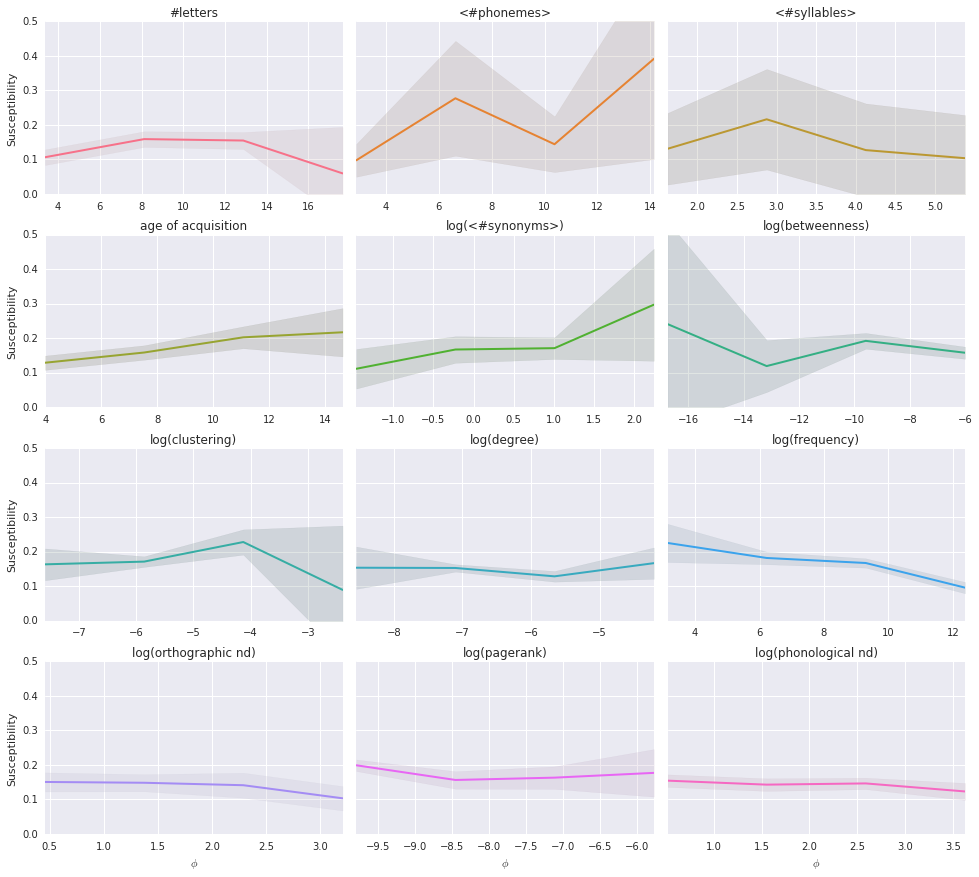

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

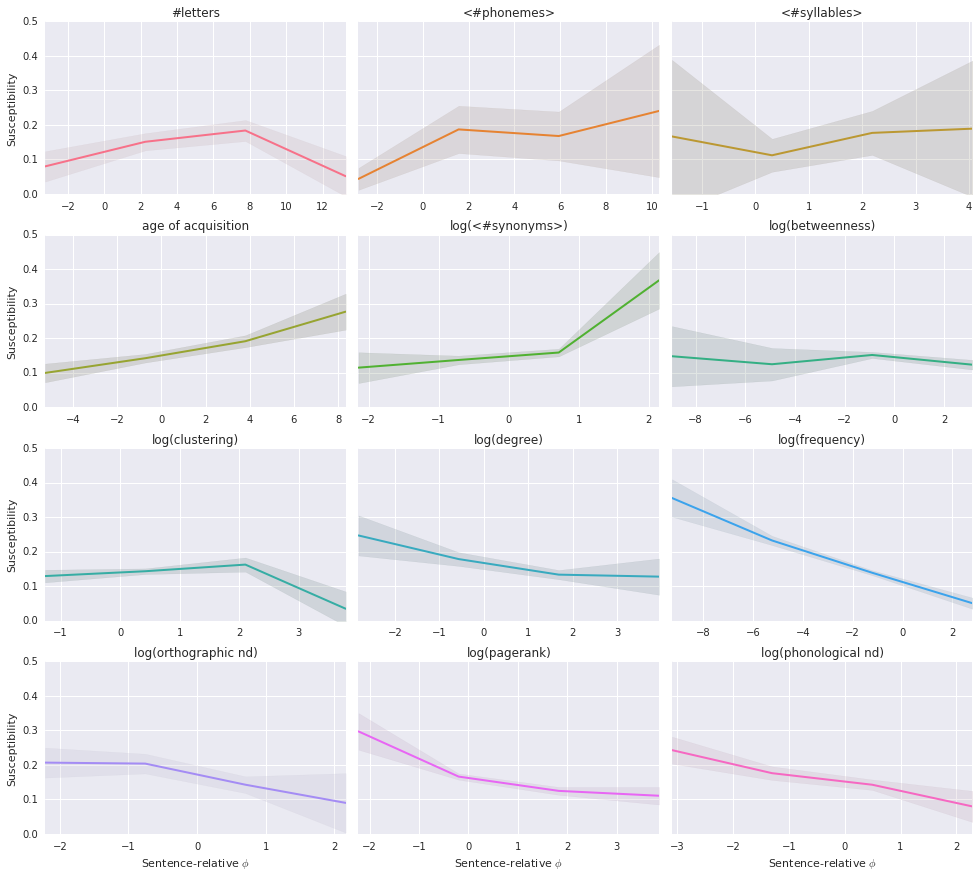

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

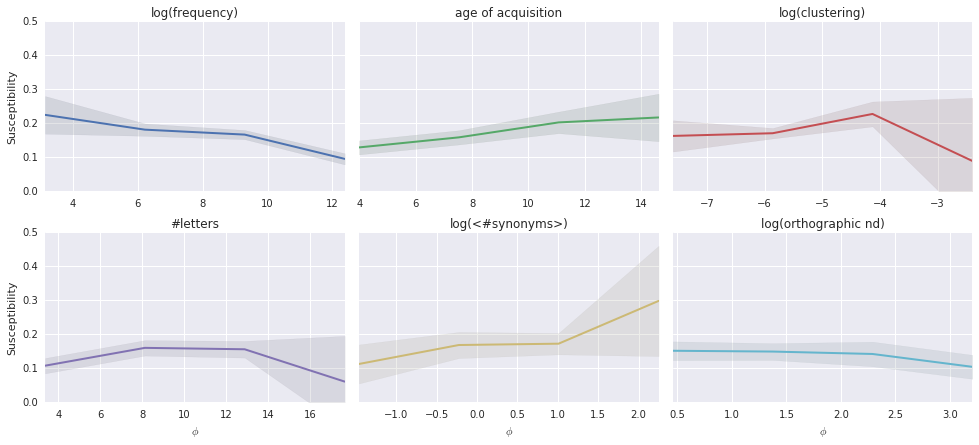

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

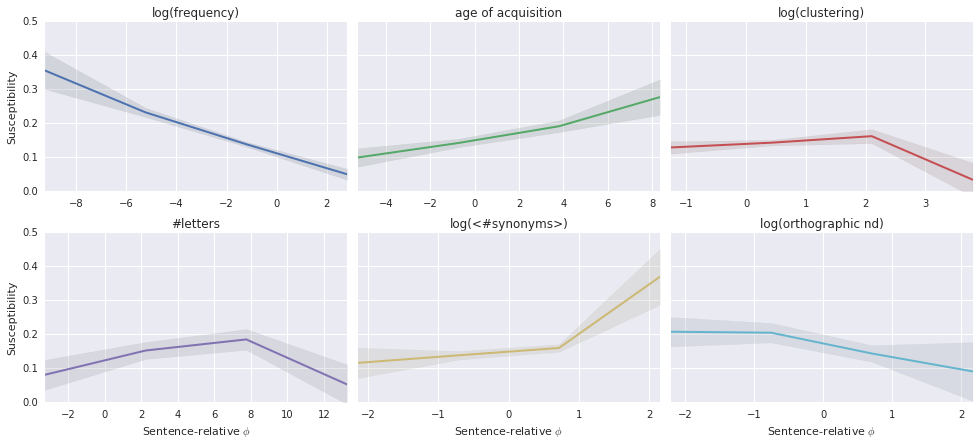

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

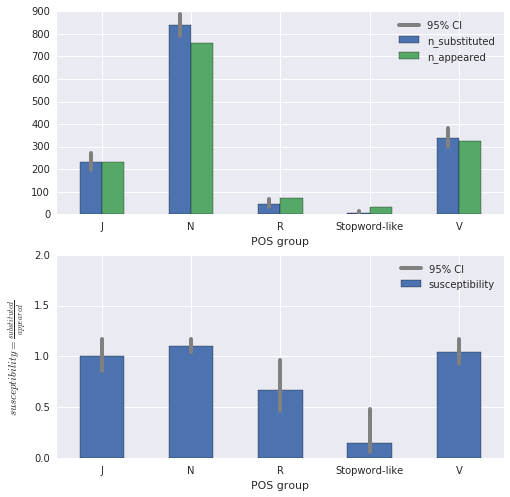

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['N', 'R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

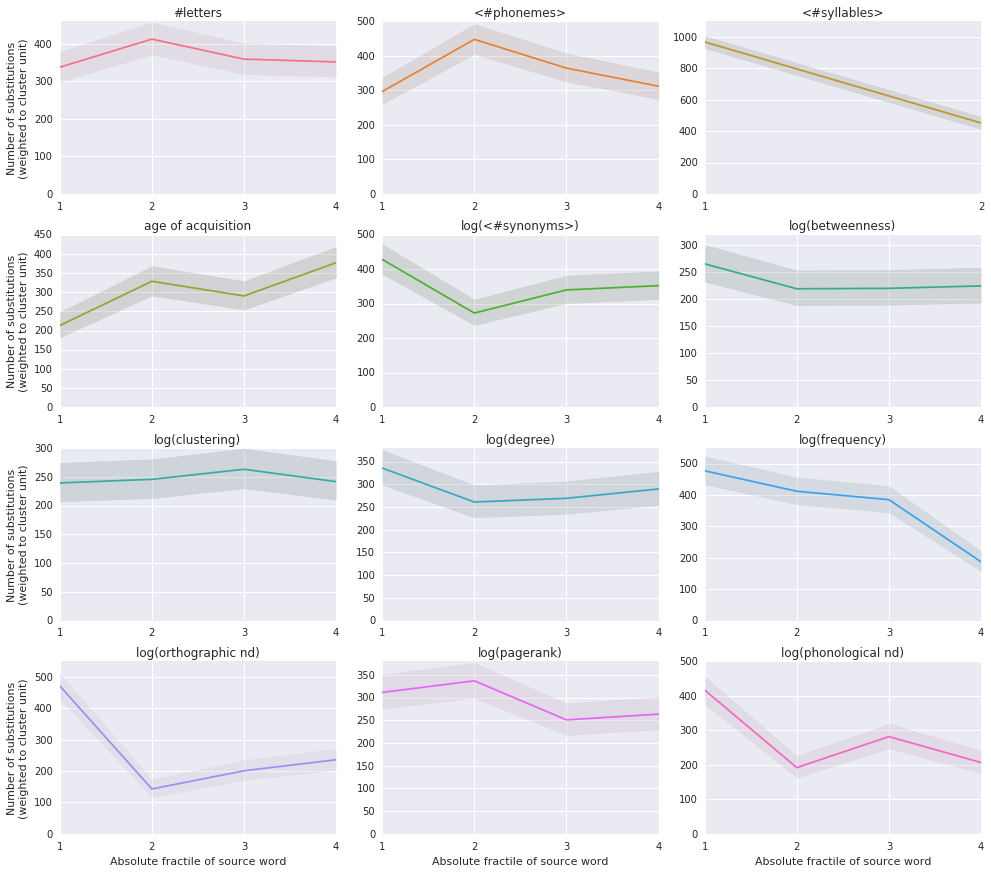

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

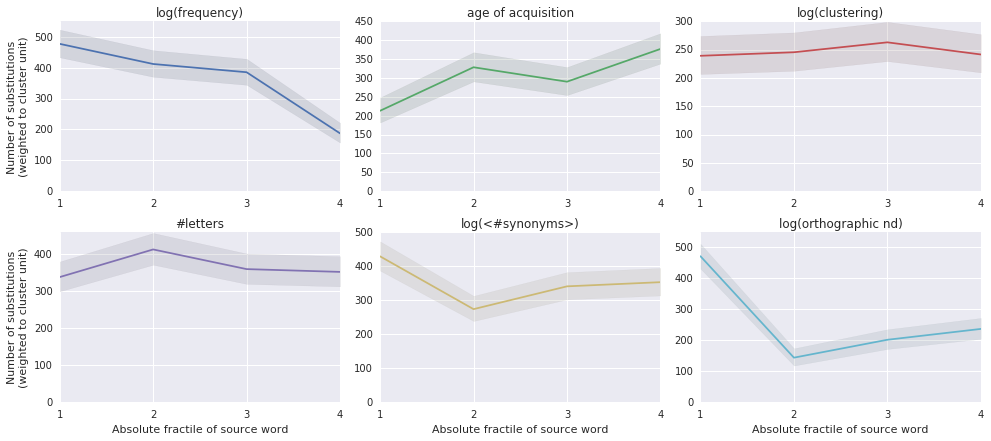

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (   69 of 39875) |                    | Elapsed Time: 0:00:01 ETA:  0:09:39

  0% (  144 of 39875) |                    | Elapsed Time: 0:00:02 ETA:  0:08:52

  0% (  225 of 39875) |                    | Elapsed Time: 0:00:03 ETA:  0:08:29

  0% (  305 of 39875) |                    | Elapsed Time: 0:00:04 ETA:  0:08:25

  0% (  385 of 39875) |                    | Elapsed Time: 0:00:05 ETA:  0:08:22

  1% (  468 of 39875) |                    | Elapsed Time: 0:00:06 ETA:  0:08:15

  1% (  499 of 39875) |                    | Elapsed Time: 0:00:06 ETA:  0:08:17

  1% (  577 of 39875) |                    | Elapsed Time: 0:00:07 ETA:  0:08:17

  1% (  652 of 39875) |                    | Elapsed Time: 0:00:08 ETA:  0:08:20

  1% (  728 of 39875) |                    | Elapsed Time: 0:00:09 ETA:  0:08:21

  2% (  800 of 39875) |                    | Elapsed Time: 0:00:10 ETA:  0:08:22

  2% (  878 of 39875) |                    | Elapsed Time: 0:00:11 ETA:  0:08:24

  2% (  957 of 39875) |                    | Elapsed Time: 0:00:12 ETA:  0:08:24

  2% (  997 of 39875) |                    | Elapsed Time: 0:00:12 ETA:  0:08:25

  2% ( 1077 of 39875) |                    | Elapsed Time: 0:00:13 ETA:  0:08:27

  2% ( 1163 of 39875) |                    | Elapsed Time: 0:00:14 ETA:  0:08:19

  3% ( 1246 of 39875) |                    | Elapsed Time: 0:00:15 ETA:  0:08:14

  3% ( 1330 of 39875) |                    | Elapsed Time: 0:00:17 ETA:  0:08:06

  3% ( 1410 of 39875) |                    | Elapsed Time: 0:00:18 ETA:  0:08:03

  3% ( 1496 of 39875) |                    | Elapsed Time: 0:00:19 ETA:  0:07:51

  3% ( 1580 of 39875) |                    | Elapsed Time: 0:00:20 ETA:  0:07:46

  4% ( 1663 of 39875) |                    | Elapsed Time: 0:00:21 ETA:  0:07:42

  4% ( 1748 of 39875) |                    | Elapsed Time: 0:00:22 ETA:  0:07:38

  4% ( 1827 of 39875) |                    | Elapsed Time: 0:00:23 ETA:  0:07:41

  4% ( 1910 of 39875) |                    | Elapsed Time: 0:00:24 ETA:  0:07:40

  5% ( 1994 of 39875) |#                   | Elapsed Time: 0:00:25 ETA:  0:07:38

  5% ( 2079 of 39875) |#                   | Elapsed Time: 0:00:26 ETA:  0:07:35

  5% ( 2155 of 39875) |#                   | Elapsed Time: 0:00:27 ETA:  0:07:40

  5% ( 2238 of 39875) |#                   | Elapsed Time: 0:00:28 ETA:  0:07:40

  5% ( 2320 of 39875) |#                   | Elapsed Time: 0:00:29 ETA:  0:07:39

  6% ( 2415 of 39875) |#                   | Elapsed Time: 0:00:30 ETA:  0:07:31

  6% ( 2493 of 39875) |#                   | Elapsed Time: 0:00:30 ETA:  0:07:18

  6% ( 2574 of 39875) |#                   | Elapsed Time: 0:00:31 ETA:  0:07:19

  6% ( 2650 of 39875) |#                   | Elapsed Time: 0:00:32 ETA:  0:07:23

  6% ( 2724 of 39875) |#                   | Elapsed Time: 0:00:33 ETA:  0:07:29

  7% ( 2803 of 39875) |#                   | Elapsed Time: 0:00:34 ETA:  0:07:32

  7% ( 2881 of 39875) |#                   | Elapsed Time: 0:00:35 ETA:  0:07:30

  7% ( 2972 of 39875) |#                   | Elapsed Time: 0:00:36 ETA:  0:07:24

  7% ( 2991 of 39875) |#                   | Elapsed Time: 0:00:37 ETA:  0:07:22

  7% ( 3066 of 39875) |#                   | Elapsed Time: 0:00:38 ETA:  0:07:35

  7% ( 3140 of 39875) |#                   | Elapsed Time: 0:00:39 ETA:  0:07:52

  8% ( 3211 of 39875) |#                   | Elapsed Time: 0:00:40 ETA:  0:07:59

  8% ( 3282 of 39875) |#                   | Elapsed Time: 0:00:41 ETA:  0:08:02

  8% ( 3350 of 39875) |#                   | Elapsed Time: 0:00:42 ETA:  0:08:06

  8% ( 3424 of 39875) |#                   | Elapsed Time: 0:00:43 ETA:  0:08:09

  8% ( 3490 of 39875) |#                   | Elapsed Time: 0:00:44 ETA:  0:08:04

  8% ( 3563 of 39875) |#                   | Elapsed Time: 0:00:45 ETA:  0:08:20

  9% ( 3630 of 39875) |#                   | Elapsed Time: 0:00:46 ETA:  0:08:27

  9% ( 3694 of 39875) |#                   | Elapsed Time: 0:00:47 ETA:  0:08:35

  9% ( 3771 of 39875) |#                   | Elapsed Time: 0:00:48 ETA:  0:08:31

  9% ( 3852 of 39875) |#                   | Elapsed Time: 0:00:49 ETA:  0:08:20

  9% ( 3926 of 39875) |#                   | Elapsed Time: 0:00:50 ETA:  0:08:16

 10% ( 3988 of 39875) |##                  | Elapsed Time: 0:00:50 ETA:  0:08:11

 10% ( 4065 of 39875) |##                  | Elapsed Time: 0:00:51 ETA:  0:08:07

 10% ( 4142 of 39875) |##                  | Elapsed Time: 0:00:52 ETA:  0:08:10

 10% ( 4217 of 39875) |##                  | Elapsed Time: 0:00:53 ETA:  0:08:07

 10% ( 4296 of 39875) |##                  | Elapsed Time: 0:00:54 ETA:  0:07:57

 11% ( 4400 of 39875) |##                  | Elapsed Time: 0:00:55 ETA:  0:07:26

 11% ( 4486 of 39875) |##                  | Elapsed Time: 0:00:57 ETA:  0:07:26

 11% ( 4566 of 39875) |##                  | Elapsed Time: 0:00:58 ETA:  0:07:20

 11% ( 4664 of 39875) |##                  | Elapsed Time: 0:00:59 ETA:  0:07:02

 11% ( 4748 of 39875) |##                  | Elapsed Time: 0:01:00 ETA:  0:06:56

 12% ( 4839 of 39875) |##                  | Elapsed Time: 0:01:01 ETA:  0:06:45

 12% ( 4916 of 39875) |##                  | Elapsed Time: 0:01:02 ETA:  0:06:43

 12% ( 4985 of 39875) |##                  | Elapsed Time: 0:01:02 ETA:  0:06:40

 12% ( 5067 of 39875) |##                  | Elapsed Time: 0:01:03 ETA:  0:06:54

 12% ( 5161 of 39875) |##                  | Elapsed Time: 0:01:04 ETA:  0:06:43

 13% ( 5237 of 39875) |##                  | Elapsed Time: 0:01:05 ETA:  0:06:47

 13% ( 5317 of 39875) |##                  | Elapsed Time: 0:01:06 ETA:  0:06:46

 13% ( 5397 of 39875) |##                  | Elapsed Time: 0:01:07 ETA:  0:06:56

 13% ( 5483 of 39875) |##                  | Elapsed Time: 0:01:09 ETA:  0:07:05

 13% ( 5558 of 39875) |##                  | Elapsed Time: 0:01:10 ETA:  0:07:06

 14% ( 5632 of 39875) |##                  | Elapsed Time: 0:01:11 ETA:  0:07:10

 14% ( 5710 of 39875) |##                  | Elapsed Time: 0:01:12 ETA:  0:07:12

 14% ( 5784 of 39875) |##                  | Elapsed Time: 0:01:13 ETA:  0:07:27

 14% ( 5860 of 39875) |##                  | Elapsed Time: 0:01:14 ETA:  0:07:26

 14% ( 5932 of 39875) |##                  | Elapsed Time: 0:01:15 ETA:  0:07:32

 15% ( 5982 of 39875) |###                 | Elapsed Time: 0:01:15 ETA:  0:07:40

 15% ( 6058 of 39875) |###                 | Elapsed Time: 0:01:16 ETA:  0:07:42

 15% ( 6134 of 39875) |###                 | Elapsed Time: 0:01:17 ETA:  0:07:40

 15% ( 6213 of 39875) |###                 | Elapsed Time: 0:01:18 ETA:  0:07:36

 15% ( 6292 of 39875) |###                 | Elapsed Time: 0:01:19 ETA:  0:07:30

 15% ( 6369 of 39875) |###                 | Elapsed Time: 0:01:20 ETA:  0:07:30

 16% ( 6444 of 39875) |###                 | Elapsed Time: 0:01:21 ETA:  0:07:29

 16% ( 6480 of 39875) |###                 | Elapsed Time: 0:01:22 ETA:  0:07:27

 16% ( 6561 of 39875) |###                 | Elapsed Time: 0:01:23 ETA:  0:07:19

 16% ( 6641 of 39875) |###                 | Elapsed Time: 0:01:24 ETA:  0:07:11

 16% ( 6720 of 39875) |###                 | Elapsed Time: 0:01:25 ETA:  0:07:08

 17% ( 6800 of 39875) |###                 | Elapsed Time: 0:01:26 ETA:  0:07:03

 17% ( 6879 of 39875) |###                 | Elapsed Time: 0:01:27 ETA:  0:07:02

 17% ( 6955 of 39875) |###                 | Elapsed Time: 0:01:28 ETA:  0:07:03

 17% ( 6979 of 39875) |###                 | Elapsed Time: 0:01:28 ETA:  0:07:03

 17% ( 7052 of 39875) |###                 | Elapsed Time: 0:01:29 ETA:  0:07:03

 17% ( 7130 of 39875) |###                 | Elapsed Time: 0:01:30 ETA:  0:07:03

 18% ( 7202 of 39875) |###                 | Elapsed Time: 0:01:31 ETA:  0:07:09

 18% ( 7276 of 39875) |###                 | Elapsed Time: 0:01:32 ETA:  0:07:13

 18% ( 7356 of 39875) |###                 | Elapsed Time: 0:01:33 ETA:  0:07:11

 18% ( 7435 of 39875) |###                 | Elapsed Time: 0:01:34 ETA:  0:07:11

 18% ( 7477 of 39875) |###                 | Elapsed Time: 0:01:35 ETA:  0:07:12

 18% ( 7556 of 39875) |###                 | Elapsed Time: 0:01:36 ETA:  0:07:08

 19% ( 7632 of 39875) |###                 | Elapsed Time: 0:01:37 ETA:  0:07:07

 19% ( 7710 of 39875) |###                 | Elapsed Time: 0:01:38 ETA:  0:07:02

 19% ( 7792 of 39875) |###                 | Elapsed Time: 0:01:39 ETA:  0:06:58

 19% ( 7879 of 39875) |###                 | Elapsed Time: 0:01:40 ETA:  0:06:45

 20% ( 7975 of 39875) |####                | Elapsed Time: 0:01:41 ETA:  0:06:33

 20% ( 8058 of 39875) |####                | Elapsed Time: 0:01:42 ETA:  0:06:29

 20% ( 8138 of 39875) |####                | Elapsed Time: 0:01:43 ETA:  0:06:28

 20% ( 8217 of 39875) |####                | Elapsed Time: 0:01:44 ETA:  0:06:27

 20% ( 8298 of 39875) |####                | Elapsed Time: 0:01:45 ETA:  0:06:23

 21% ( 8382 of 39875) |####                | Elapsed Time: 0:01:46 ETA:  0:06:17

 21% ( 8474 of 39875) |####                | Elapsed Time: 0:01:47 ETA:  0:06:17

 21% ( 8563 of 39875) |####                | Elapsed Time: 0:01:48 ETA:  0:06:15

 21% ( 8655 of 39875) |####                | Elapsed Time: 0:01:49 ETA:  0:06:08

 21% ( 8741 of 39875) |####                | Elapsed Time: 0:01:50 ETA:  0:06:04

 22% ( 8828 of 39875) |####                | Elapsed Time: 0:01:51 ETA:  0:05:58

 22% ( 8915 of 39875) |####                | Elapsed Time: 0:01:52 ETA:  0:05:51

 22% ( 8972 of 39875) |####                | Elapsed Time: 0:01:53 ETA:  0:05:48

 22% ( 9056 of 39875) |####                | Elapsed Time: 0:01:54 ETA:  0:05:47

 22% ( 9144 of 39875) |####                | Elapsed Time: 0:01:55 ETA:  0:05:44

 23% ( 9232 of 39875) |####                | Elapsed Time: 0:01:56 ETA:  0:05:42

 23% ( 9323 of 39875) |####                | Elapsed Time: 0:01:57 ETA:  0:05:39

 23% ( 9412 of 39875) |####                | Elapsed Time: 0:01:58 ETA:  0:05:41

 23% ( 9471 of 39875) |####                | Elapsed Time: 0:01:58 ETA:  0:05:37

 23% ( 9563 of 39875) |####                | Elapsed Time: 0:01:59 ETA:  0:05:32

 24% ( 9654 of 39875) |####                | Elapsed Time: 0:02:00 ETA:  0:05:29

 24% ( 9740 of 39875) |####                | Elapsed Time: 0:02:01 ETA:  0:05:28

 24% ( 9826 of 39875) |####                | Elapsed Time: 0:02:02 ETA:  0:05:26

 24% ( 9919 of 39875) |####                | Elapsed Time: 0:02:03 ETA:  0:05:22

 24% ( 9943 of 39875) |####                | Elapsed Time: 0:02:06 ETA:  0:07:01

 25% ( 9969 of 39875) |#####               | Elapsed Time: 0:02:06 ETA:  0:07:13

 25% (10056 of 39875) |#####               | Elapsed Time: 0:02:07 ETA:  0:07:13

 25% (10144 of 39875) |#####               | Elapsed Time: 0:02:08 ETA:  0:07:10

 25% (10232 of 39875) |#####               | Elapsed Time: 0:02:09 ETA:  0:07:13

 25% (10321 of 39875) |#####               | Elapsed Time: 0:02:10 ETA:  0:07:14

 26% (10407 of 39875) |#####               | Elapsed Time: 0:02:11 ETA:  0:07:13

 26% (10468 of 39875) |#####               | Elapsed Time: 0:02:12 ETA:  0:07:18

 26% (10556 of 39875) |#####               | Elapsed Time: 0:02:13 ETA:  0:07:21

 26% (10647 of 39875) |#####               | Elapsed Time: 0:02:14 ETA:  0:05:24

 26% (10743 of 39875) |#####               | Elapsed Time: 0:02:15 ETA:  0:05:17

 27% (10832 of 39875) |#####               | Elapsed Time: 0:02:16 ETA:  0:05:15

 27% (10920 of 39875) |#####               | Elapsed Time: 0:02:17 ETA:  0:05:14

 27% (10966 of 39875) |#####               | Elapsed Time: 0:02:17 ETA:  0:05:14

 27% (11056 of 39875) |#####               | Elapsed Time: 0:02:18 ETA:  0:05:13

 27% (11150 of 39875) |#####               | Elapsed Time: 0:02:19 ETA:  0:05:07

 28% (11269 of 39875) |#####               | Elapsed Time: 0:02:20 ETA:  0:04:46

 28% (11349 of 39875) |#####               | Elapsed Time: 0:02:21 ETA:  0:04:50

 28% (11428 of 39875) |#####               | Elapsed Time: 0:02:22 ETA:  0:04:56

 28% (11465 of 39875) |#####               | Elapsed Time: 0:02:23 ETA:  0:05:03

 28% (11542 of 39875) |#####               | Elapsed Time: 0:02:24 ETA:  0:05:10

 29% (11617 of 39875) |#####               | Elapsed Time: 0:02:25 ETA:  0:05:17

 29% (11692 of 39875) |#####               | Elapsed Time: 0:02:26 ETA:  0:05:23

 29% (11783 of 39875) |#####               | Elapsed Time: 0:02:27 ETA:  0:05:21

 29% (11860 of 39875) |#####               | Elapsed Time: 0:02:28 ETA:  0:05:32

 29% (11935 of 39875) |#####               | Elapsed Time: 0:02:29 ETA:  0:06:02

 30% (11963 of 39875) |######              | Elapsed Time: 0:02:29 ETA:  0:06:06

 30% (12033 of 39875) |######              | Elapsed Time: 0:02:30 ETA:  0:06:12

 30% (12101 of 39875) |######              | Elapsed Time: 0:02:31 ETA:  0:06:17

 30% (12169 of 39875) |######              | Elapsed Time: 0:02:32 ETA:  0:06:23

 30% (12238 of 39875) |######              | Elapsed Time: 0:02:33 ETA:  0:06:28

 30% (12326 of 39875) |######              | Elapsed Time: 0:02:34 ETA:  0:06:16

 31% (12414 of 39875) |######              | Elapsed Time: 0:02:35 ETA:  0:06:17

 31% (12461 of 39875) |######              | Elapsed Time: 0:02:36 ETA:  0:06:11

 31% (12547 of 39875) |######              | Elapsed Time: 0:02:37 ETA:  0:06:01

 31% (12637 of 39875) |######              | Elapsed Time: 0:02:38 ETA:  0:05:48

 31% (12728 of 39875) |######              | Elapsed Time: 0:02:39 ETA:  0:05:32

 32% (12804 of 39875) |######              | Elapsed Time: 0:02:40 ETA:  0:05:26

 32% (12878 of 39875) |######              | Elapsed Time: 0:02:41 ETA:  0:05:21

 32% (12960 of 39875) |######              | Elapsed Time: 0:02:42 ETA:  0:05:06

 32% (13054 of 39875) |######              | Elapsed Time: 0:02:43 ETA:  0:05:01

 32% (13136 of 39875) |######              | Elapsed Time: 0:02:44 ETA:  0:05:04

 33% (13217 of 39875) |######              | Elapsed Time: 0:02:45 ETA:  0:05:08

 33% (13299 of 39875) |######              | Elapsed Time: 0:02:46 ETA:  0:05:10

 33% (13381 of 39875) |######              | Elapsed Time: 0:02:47 ETA:  0:05:14

 33% (13458 of 39875) |######              | Elapsed Time: 0:02:48 ETA:  0:05:18

 33% (13540 of 39875) |######              | Elapsed Time: 0:02:49 ETA:  0:05:14

 34% (13619 of 39875) |######              | Elapsed Time: 0:02:50 ETA:  0:05:09

 34% (13698 of 39875) |######              | Elapsed Time: 0:02:51 ETA:  0:05:15

 34% (13773 of 39875) |######              | Elapsed Time: 0:02:52 ETA:  0:05:26

 34% (13846 of 39875) |######              | Elapsed Time: 0:02:53 ETA:  0:05:32

 34% (13927 of 39875) |######              | Elapsed Time: 0:02:54 ETA:  0:05:30

 35% (13957 of 39875) |#######             | Elapsed Time: 0:02:54 ETA:  0:05:27

 35% (14046 of 39875) |#######             | Elapsed Time: 0:02:55 ETA:  0:05:21

 35% (14115 of 39875) |#######             | Elapsed Time: 0:02:56 ETA:  0:05:30

 35% (14193 of 39875) |#######             | Elapsed Time: 0:02:57 ETA:  0:05:32

 35% (14290 of 39875) |#######             | Elapsed Time: 0:02:58 ETA:  0:05:17

 36% (14390 of 39875) |#######             | Elapsed Time: 0:02:59 ETA:  0:05:01

 36% (14455 of 39875) |#######             | Elapsed Time: 0:03:00 ETA:  0:04:50

 36% (14558 of 39875) |#######             | Elapsed Time: 0:03:01 ETA:  0:04:29

 36% (14646 of 39875) |#######             | Elapsed Time: 0:03:02 ETA:  0:04:24

 36% (14728 of 39875) |#######             | Elapsed Time: 0:03:03 ETA:  0:04:29

 37% (14803 of 39875) |#######             | Elapsed Time: 0:03:04 ETA:  0:04:37

 37% (14890 of 39875) |#######             | Elapsed Time: 0:03:05 ETA:  0:04:25

 37% (14954 of 39875) |#######             | Elapsed Time: 0:03:06 ETA:  0:04:21

 37% (15030 of 39875) |#######             | Elapsed Time: 0:03:07 ETA:  0:04:33

 37% (15105 of 39875) |#######             | Elapsed Time: 0:03:08 ETA:  0:04:48

 38% (15205 of 39875) |#######             | Elapsed Time: 0:03:09 ETA:  0:04:40

 38% (15306 of 39875) |#######             | Elapsed Time: 0:03:10 ETA:  0:04:40

 38% (15399 of 39875) |#######             | Elapsed Time: 0:03:11 ETA:  0:04:36

 38% (15452 of 39875) |#######             | Elapsed Time: 0:03:11 ETA:  0:04:34

 38% (15542 of 39875) |#######             | Elapsed Time: 0:03:12 ETA:  0:04:23

 39% (15664 of 39875) |#######             | Elapsed Time: 0:03:13 ETA:  0:04:01

 39% (15782 of 39875) |#######             | Elapsed Time: 0:03:14 ETA:  0:03:42

 39% (15866 of 39875) |#######             | Elapsed Time: 0:03:15 ETA:  0:03:37

 40% (15950 of 39875) |########            | Elapsed Time: 0:03:16 ETA:  0:03:35

 40% (16046 of 39875) |########            | Elapsed Time: 0:03:17 ETA:  0:03:37

 40% (16153 of 39875) |########            | Elapsed Time: 0:03:18 ETA:  0:03:28

 40% (16250 of 39875) |########            | Elapsed Time: 0:03:19 ETA:  0:03:23

 40% (16321 of 39875) |########            | Elapsed Time: 0:03:20 ETA:  0:03:32

 41% (16392 of 39875) |########            | Elapsed Time: 0:03:21 ETA:  0:04:00

 41% (16449 of 39875) |########            | Elapsed Time: 0:03:22 ETA:  0:04:25

 41% (16515 of 39875) |########            | Elapsed Time: 0:03:23 ETA:  0:04:37

 41% (16598 of 39875) |########            | Elapsed Time: 0:03:24 ETA:  0:04:35

 41% (16685 of 39875) |########            | Elapsed Time: 0:03:25 ETA:  0:04:31

 42% (16774 of 39875) |########            | Elapsed Time: 0:03:26 ETA:  0:04:35

 42% (16856 of 39875) |########            | Elapsed Time: 0:03:27 ETA:  0:04:51

 42% (16947 of 39875) |########            | Elapsed Time: 0:03:28 ETA:  0:04:52

 42% (17019 of 39875) |########            | Elapsed Time: 0:03:29 ETA:  0:04:50

 42% (17101 of 39875) |########            | Elapsed Time: 0:03:30 ETA:  0:04:45

 43% (17196 of 39875) |########            | Elapsed Time: 0:03:31 ETA:  0:04:23

 43% (17254 of 39875) |########            | Elapsed Time: 0:03:32 ETA:  0:04:41

 43% (17315 of 39875) |########            | Elapsed Time: 0:03:33 ETA:  0:05:01

 43% (17380 of 39875) |########            | Elapsed Time: 0:03:34 ETA:  0:05:21

 43% (17446 of 39875) |########            | Elapsed Time: 0:03:35 ETA:  0:05:20

 43% (17538 of 39875) |########            | Elapsed Time: 0:03:36 ETA:  0:05:13

 44% (17607 of 39875) |########            | Elapsed Time: 0:03:37 ETA:  0:05:17

 44% (17680 of 39875) |########            | Elapsed Time: 0:03:38 ETA:  0:05:16

 44% (17762 of 39875) |########            | Elapsed Time: 0:03:39 ETA:  0:05:15

 44% (17844 of 39875) |########            | Elapsed Time: 0:03:40 ETA:  0:05:24

 44% (17928 of 39875) |########            | Elapsed Time: 0:03:41 ETA:  0:05:02

 45% (17944 of 39875) |#########           | Elapsed Time: 0:03:41 ETA:  0:04:48

 45% (18021 of 39875) |#########           | Elapsed Time: 0:03:42 ETA:  0:04:37

 45% (18111 of 39875) |#########           | Elapsed Time: 0:03:43 ETA:  0:04:31

 45% (18212 of 39875) |#########           | Elapsed Time: 0:03:44 ETA:  0:04:24

 45% (18302 of 39875) |#########           | Elapsed Time: 0:03:45 ETA:  0:04:08

 46% (18394 of 39875) |#########           | Elapsed Time: 0:03:46 ETA:  0:03:54

 46% (18443 of 39875) |#########           | Elapsed Time: 0:03:47 ETA:  0:03:53

 46% (18526 of 39875) |#########           | Elapsed Time: 0:03:48 ETA:  0:03:52

 46% (18605 of 39875) |#########           | Elapsed Time: 0:03:49 ETA:  0:03:54

 46% (18676 of 39875) |#########           | Elapsed Time: 0:03:50 ETA:  0:04:02

 47% (18747 of 39875) |#########           | Elapsed Time: 0:03:51 ETA:  0:04:05

 47% (18828 of 39875) |#########           | Elapsed Time: 0:03:52 ETA:  0:04:09

 47% (18911 of 39875) |#########           | Elapsed Time: 0:03:53 ETA:  0:04:22

 47% (18941 of 39875) |#########           | Elapsed Time: 0:03:53 ETA:  0:04:28

 47% (19039 of 39875) |#########           | Elapsed Time: 0:03:54 ETA:  0:04:23

 48% (19150 of 39875) |#########           | Elapsed Time: 0:03:55 ETA:  0:04:00

 48% (19243 of 39875) |#########           | Elapsed Time: 0:03:56 ETA:  0:03:52

 48% (19329 of 39875) |#########           | Elapsed Time: 0:03:57 ETA:  0:03:46

 48% (19410 of 39875) |#########           | Elapsed Time: 0:03:58 ETA:  0:03:39

 48% (19440 of 39875) |#########           | Elapsed Time: 0:03:59 ETA:  0:03:29

 48% (19523 of 39875) |#########           | Elapsed Time: 0:04:00 ETA:  0:03:27

 49% (19602 of 39875) |#########           | Elapsed Time: 0:04:01 ETA:  0:03:29

 49% (19674 of 39875) |#########           | Elapsed Time: 0:04:02 ETA:  0:03:36

 49% (19769 of 39875) |#########           | Elapsed Time: 0:04:03 ETA:  0:03:37

 49% (19851 of 39875) |#########           | Elapsed Time: 0:04:04 ETA:  0:03:55

 49% (19922 of 39875) |#########           | Elapsed Time: 0:04:05 ETA:  0:04:09

 50% (19938 of 39875) |##########          | Elapsed Time: 0:04:05 ETA:  0:04:15

 50% (20005 of 39875) |##########          | Elapsed Time: 0:04:06 ETA:  0:04:26

 50% (20074 of 39875) |##########          | Elapsed Time: 0:04:07 ETA:  0:04:33

 50% (20150 of 39875) |##########          | Elapsed Time: 0:04:08 ETA:  0:04:38

 50% (20238 of 39875) |##########          | Elapsed Time: 0:04:09 ETA:  0:04:29

 50% (20325 of 39875) |##########          | Elapsed Time: 0:04:10 ETA:  0:04:16

 51% (20436 of 39875) |##########          | Elapsed Time: 0:04:11 ETA:  0:04:10

 51% (20546 of 39875) |##########          | Elapsed Time: 0:04:12 ETA:  0:03:38

 51% (20638 of 39875) |##########          | Elapsed Time: 0:04:13 ETA:  0:03:29

 51% (20711 of 39875) |##########          | Elapsed Time: 0:04:14 ETA:  0:03:24

 52% (20791 of 39875) |##########          | Elapsed Time: 0:04:15 ETA:  0:03:16

 52% (20877 of 39875) |##########          | Elapsed Time: 0:04:16 ETA:  0:03:09

 52% (20935 of 39875) |##########          | Elapsed Time: 0:04:17 ETA:  0:03:16

 52% (21011 of 39875) |##########          | Elapsed Time: 0:04:18 ETA:  0:03:23

 52% (21105 of 39875) |##########          | Elapsed Time: 0:04:19 ETA:  0:03:27

 53% (21191 of 39875) |##########          | Elapsed Time: 0:04:20 ETA:  0:03:27

 53% (21263 of 39875) |##########          | Elapsed Time: 0:04:21 ETA:  0:03:51

 53% (21351 of 39875) |##########          | Elapsed Time: 0:04:22 ETA:  0:03:53

 53% (21433 of 39875) |##########          | Elapsed Time: 0:04:23 ETA:  0:03:42

 53% (21512 of 39875) |##########          | Elapsed Time: 0:04:24 ETA:  0:03:42

 54% (21595 of 39875) |##########          | Elapsed Time: 0:04:25 ETA:  0:03:43

 54% (21661 of 39875) |##########          | Elapsed Time: 0:04:26 ETA:  0:03:47

 54% (21724 of 39875) |##########          | Elapsed Time: 0:04:27 ETA:  0:03:55

 54% (21811 of 39875) |##########          | Elapsed Time: 0:04:28 ETA:  0:03:59

 54% (21899 of 39875) |##########          | Elapsed Time: 0:04:29 ETA:  0:03:57

 55% (21932 of 39875) |###########         | Elapsed Time: 0:04:29 ETA:  0:03:48

 55% (22022 of 39875) |###########         | Elapsed Time: 0:04:30 ETA:  0:03:46

 55% (22109 of 39875) |###########         | Elapsed Time: 0:04:31 ETA:  0:03:45

 55% (22179 of 39875) |###########         | Elapsed Time: 0:04:32 ETA:  0:03:51

 55% (22258 of 39875) |###########         | Elapsed Time: 0:04:33 ETA:  0:03:53

 56% (22338 of 39875) |###########         | Elapsed Time: 0:04:34 ETA:  0:03:41

 56% (22430 of 39875) |###########         | Elapsed Time: 0:04:36 ETA:  0:03:27

 56% (22513 of 39875) |###########         | Elapsed Time: 0:04:37 ETA:  0:03:30

 56% (22596 of 39875) |###########         | Elapsed Time: 0:04:38 ETA:  0:03:30

 56% (22680 of 39875) |###########         | Elapsed Time: 0:04:39 ETA:  0:03:34

 57% (22766 of 39875) |###########         | Elapsed Time: 0:04:40 ETA:  0:03:33

 57% (22851 of 39875) |###########         | Elapsed Time: 0:04:41 ETA:  0:03:21

 57% (22929 of 39875) |###########         | Elapsed Time: 0:04:41 ETA:  0:03:07

 57% (23012 of 39875) |###########         | Elapsed Time: 0:04:42 ETA:  0:03:04

 57% (23081 of 39875) |###########         | Elapsed Time: 0:04:43 ETA:  0:03:14

 58% (23193 of 39875) |###########         | Elapsed Time: 0:04:44 ETA:  0:02:56

 58% (23276 of 39875) |###########         | Elapsed Time: 0:04:45 ETA:  0:02:55

 58% (23346 of 39875) |###########         | Elapsed Time: 0:04:46 ETA:  0:03:02

 58% (23427 of 39875) |###########         | Elapsed Time: 0:04:47 ETA:  0:03:06

 58% (23507 of 39875) |###########         | Elapsed Time: 0:04:48 ETA:  0:03:09

 59% (23582 of 39875) |###########         | Elapsed Time: 0:04:49 ETA:  0:03:25

 59% (23589 of 39875) |###########         | Elapsed Time: 0:04:52 ETA:  0:05:58

 59% (23663 of 39875) |###########         | Elapsed Time: 0:04:53 ETA:  0:05:51

 59% (23737 of 39875) |###########         | Elapsed Time: 0:04:54 ETA:  0:06:35

 59% (23809 of 39875) |###########         | Elapsed Time: 0:04:55 ETA:  0:06:47

 59% (23881 of 39875) |###########         | Elapsed Time: 0:04:56 ETA:  0:06:44

 60% (23925 of 39875) |############        | Elapsed Time: 0:04:56 ETA:  0:06:57

 60% (24000 of 39875) |############        | Elapsed Time: 0:04:57 ETA:  0:06:35

 60% (24072 of 39875) |############        | Elapsed Time: 0:04:58 ETA:  0:06:44

 60% (24155 of 39875) |############        | Elapsed Time: 0:04:59 ETA:  0:06:33

 60% (24225 of 39875) |############        | Elapsed Time: 0:05:00 ETA:  0:04:01

 60% (24299 of 39875) |############        | Elapsed Time: 0:05:01 ETA:  0:04:01

 61% (24380 of 39875) |############        | Elapsed Time: 0:05:02 ETA:  0:03:54

 61% (24424 of 39875) |############        | Elapsed Time: 0:05:03 ETA:  0:03:39

 61% (24516 of 39875) |############        | Elapsed Time: 0:05:04 ETA:  0:03:21

 61% (24622 of 39875) |############        | Elapsed Time: 0:05:05 ETA:  0:02:58

 62% (24723 of 39875) |############        | Elapsed Time: 0:05:06 ETA:  0:02:40

 62% (24812 of 39875) |############        | Elapsed Time: 0:05:07 ETA:  0:02:28

 62% (24922 of 39875) |############        | Elapsed Time: 0:05:08 ETA:  0:02:05

 62% (25006 of 39875) |############        | Elapsed Time: 0:05:09 ETA:  0:01:58

 62% (25097 of 39875) |############        | Elapsed Time: 0:05:10 ETA:  0:01:51

 63% (25166 of 39875) |############        | Elapsed Time: 0:05:11 ETA:  0:02:08

 63% (25269 of 39875) |############        | Elapsed Time: 0:05:12 ETA:  0:02:00

 63% (25345 of 39875) |############        | Elapsed Time: 0:05:13 ETA:  0:02:17

 63% (25421 of 39875) |############        | Elapsed Time: 0:05:14 ETA:  0:02:17

 63% (25502 of 39875) |############        | Elapsed Time: 0:05:15 ETA:  0:02:22

 64% (25585 of 39875) |############        | Elapsed Time: 0:05:16 ETA:  0:02:32

 64% (25660 of 39875) |############        | Elapsed Time: 0:05:17 ETA:  0:02:37

 64% (25742 of 39875) |############        | Elapsed Time: 0:05:18 ETA:  0:02:38

 64% (25816 of 39875) |############        | Elapsed Time: 0:05:19 ETA:  0:02:48

 64% (25901 of 39875) |############        | Elapsed Time: 0:05:20 ETA:  0:02:36

 65% (25919 of 39875) |#############       | Elapsed Time: 0:05:20 ETA:  0:02:52

 65% (25994 of 39875) |#############       | Elapsed Time: 0:05:21 ETA:  0:02:52

 65% (26074 of 39875) |#############       | Elapsed Time: 0:05:22 ETA:  0:03:04

 65% (26151 of 39875) |#############       | Elapsed Time: 0:05:23 ETA:  0:03:06

 65% (26230 of 39875) |#############       | Elapsed Time: 0:05:24 ETA:  0:03:07

 66% (26325 of 39875) |#############       | Elapsed Time: 0:05:25 ETA:  0:02:51

 66% (26418 of 39875) |#############       | Elapsed Time: 0:05:26 ETA:  0:02:42

 66% (26514 of 39875) |#############       | Elapsed Time: 0:05:27 ETA:  0:02:32

 66% (26599 of 39875) |#############       | Elapsed Time: 0:05:28 ETA:  0:02:28

 66% (26678 of 39875) |#############       | Elapsed Time: 0:05:29 ETA:  0:02:24

 67% (26762 of 39875) |#############       | Elapsed Time: 0:05:30 ETA:  0:02:21

 67% (26836 of 39875) |#############       | Elapsed Time: 0:05:31 ETA:  0:02:23

 67% (26900 of 39875) |#############       | Elapsed Time: 0:05:32 ETA:  0:02:33

 67% (26916 of 39875) |#############       | Elapsed Time: 0:05:32 ETA:  0:02:46

 67% (26985 of 39875) |#############       | Elapsed Time: 0:05:33 ETA:  0:02:58

 67% (27078 of 39875) |#############       | Elapsed Time: 0:05:34 ETA:  0:02:46

 68% (27175 of 39875) |#############       | Elapsed Time: 0:05:35 ETA:  0:02:43

 68% (27255 of 39875) |#############       | Elapsed Time: 0:05:37 ETA:  0:02:46

 68% (27338 of 39875) |#############       | Elapsed Time: 0:05:38 ETA:  0:02:43

 68% (27415 of 39875) |#############       | Elapsed Time: 0:05:38 ETA:  0:02:38

 68% (27508 of 39875) |#############       | Elapsed Time: 0:05:39 ETA:  0:02:23

 69% (27590 of 39875) |#############       | Elapsed Time: 0:05:40 ETA:  0:02:09

 69% (27674 of 39875) |#############       | Elapsed Time: 0:05:41 ETA:  0:02:06

 69% (27755 of 39875) |#############       | Elapsed Time: 0:05:42 ETA:  0:01:58

 69% (27844 of 39875) |#############       | Elapsed Time: 0:05:43 ETA:  0:02:00

 70% (27913 of 39875) |##############      | Elapsed Time: 0:05:44 ETA:  0:02:13

 70% (28011 of 39875) |##############      | Elapsed Time: 0:05:45 ETA:  0:02:01

 70% (28098 of 39875) |##############      | Elapsed Time: 0:05:46 ETA:  0:01:57

 70% (28184 of 39875) |##############      | Elapsed Time: 0:05:47 ETA:  0:01:58

 70% (28277 of 39875) |##############      | Elapsed Time: 0:05:48 ETA:  0:01:56

 71% (28371 of 39875) |##############      | Elapsed Time: 0:05:49 ETA:  0:01:49

 71% (28411 of 39875) |##############      | Elapsed Time: 0:05:50 ETA:  0:01:46

 71% (28498 of 39875) |##############      | Elapsed Time: 0:05:51 ETA:  0:01:42

 71% (28592 of 39875) |##############      | Elapsed Time: 0:05:52 ETA:  0:01:38

 71% (28706 of 39875) |##############      | Elapsed Time: 0:05:53 ETA:  0:01:14

 72% (28781 of 39875) |##############      | Elapsed Time: 0:05:54 ETA:  0:01:26

 72% (28882 of 39875) |##############      | Elapsed Time: 0:05:55 ETA:  0:01:17

 72% (28910 of 39875) |##############      | Elapsed Time: 0:05:55 ETA:  0:01:16

 72% (28990 of 39875) |##############      | Elapsed Time: 0:05:56 ETA:  0:01:23

 72% (29060 of 39875) |##############      | Elapsed Time: 0:05:57 ETA:  0:01:37

 73% (29130 of 39875) |##############      | Elapsed Time: 0:05:58 ETA:  0:01:47

 73% (29217 of 39875) |##############      | Elapsed Time: 0:05:59 ETA:  0:01:46

 73% (29315 of 39875) |##############      | Elapsed Time: 0:06:00 ETA:  0:01:43

 73% (29408 of 39875) |##############      | Elapsed Time: 0:06:01 ETA:  0:02:01

 73% (29492 of 39875) |##############      | Elapsed Time: 0:06:02 ETA:  0:02:14

 74% (29577 of 39875) |##############      | Elapsed Time: 0:06:03 ETA:  0:02:08

 74% (29656 of 39875) |##############      | Elapsed Time: 0:06:04 ETA:  0:02:09

 74% (29727 of 39875) |##############      | Elapsed Time: 0:06:06 ETA:  0:02:07

 74% (29820 of 39875) |##############      | Elapsed Time: 0:06:07 ETA:  0:01:49

 75% (29907 of 39875) |###############     | Elapsed Time: 0:06:07 ETA:  0:01:40

 75% (30002 of 39875) |###############     | Elapsed Time: 0:06:08 ETA:  0:01:41

 75% (30100 of 39875) |###############     | Elapsed Time: 0:06:09 ETA:  0:01:25

 75% (30182 of 39875) |###############     | Elapsed Time: 0:06:10 ETA:  0:01:28

 75% (30271 of 39875) |###############     | Elapsed Time: 0:06:11 ETA:  0:01:24

 76% (30347 of 39875) |###############     | Elapsed Time: 0:06:12 ETA:  0:01:28

 76% (30405 of 39875) |###############     | Elapsed Time: 0:06:13 ETA:  0:01:20

 76% (30501 of 39875) |###############     | Elapsed Time: 0:06:14 ETA:  0:01:04

 76% (30606 of 39875) |###############     | Elapsed Time: 0:06:15 ETA:  0:00:57

 77% (30712 of 39875) |###############     | Elapsed Time: 0:06:16 ETA:  0:00:52

 77% (30805 of 39875) |###############     | Elapsed Time: 0:06:17 ETA:  0:00:52

 77% (30904 of 39875) |###############     | Elapsed Time: 0:06:18 ETA:  0:00:47

 77% (31001 of 39875) |###############     | Elapsed Time: 0:06:19 ETA:  0:00:41

 77% (31091 of 39875) |###############     | Elapsed Time: 0:06:20 ETA:  0:00:32

 78% (31191 of 39875) |###############     | Elapsed Time: 0:06:21 ETA:  0:00:29

 78% (31268 of 39875) |###############     | Elapsed Time: 0:06:22 ETA:  0:00:39

 78% (31363 of 39875) |###############     | Elapsed Time: 0:06:23 ETA:  0:00:43

 78% (31402 of 39875) |###############     | Elapsed Time: 0:06:23 ETA:  0:00:42

 78% (31483 of 39875) |###############     | Elapsed Time: 0:06:24 ETA:  0:00:49

 79% (31574 of 39875) |###############     | Elapsed Time: 0:06:25 ETA:  0:00:49

 79% (31658 of 39875) |###############     | Elapsed Time: 0:06:26 ETA:  0:00:53

 79% (31752 of 39875) |###############     | Elapsed Time: 0:06:27 ETA:  0:00:54

 79% (31819 of 39875) |###############     | Elapsed Time: 0:06:28 ETA:  0:01:07

 80% (31900 of 39875) |################    | Elapsed Time: 0:06:29 ETA:  0:01:12

 80% (31977 of 39875) |################    | Elapsed Time: 0:06:30 ETA:  0:01:11

 80% (32053 of 39875) |################    | Elapsed Time: 0:06:31 ETA:  0:01:23

 80% (32141 of 39875) |################    | Elapsed Time: 0:06:32 ETA:  0:01:30

 80% (32222 of 39875) |################    | Elapsed Time: 0:06:33 ETA:  0:01:29

 81% (32304 of 39875) |################    | Elapsed Time: 0:06:34 ETA:  0:01:34

 81% (32399 of 39875) |################    | Elapsed Time: 0:06:35 ETA:  0:01:37

 81% (32486 of 39875) |################    | Elapsed Time: 0:06:36 ETA:  0:01:21

 81% (32570 of 39875) |################    | Elapsed Time: 0:06:37 ETA:  0:01:23

 81% (32651 of 39875) |################    | Elapsed Time: 0:06:38 ETA:  0:01:19

 82% (32729 of 39875) |################    | Elapsed Time: 0:06:39 ETA:  0:01:17

 82% (32822 of 39875) |################    | Elapsed Time: 0:06:40 ETA:  0:01:13

 82% (32897 of 39875) |################    | Elapsed Time: 0:06:41 ETA:  0:01:02

 82% (32985 of 39875) |################    | Elapsed Time: 0:06:42 ETA:  0:00:57

 82% (33076 of 39875) |################    | Elapsed Time: 0:06:43 ETA:  0:00:57

 83% (33149 of 39875) |################    | Elapsed Time: 0:06:44 ETA:  0:01:04

 83% (33239 of 39875) |################    | Elapsed Time: 0:06:45 ETA:  0:01:01

 83% (33326 of 39875) |################    | Elapsed Time: 0:06:46 ETA:  0:00:58

 83% (33396 of 39875) |################    | Elapsed Time: 0:06:47 ETA:  0:00:53

 83% (33485 of 39875) |################    | Elapsed Time: 0:06:48 ETA:  0:00:45

 84% (33575 of 39875) |################    | Elapsed Time: 0:06:49 ETA:  0:00:46

 84% (33669 of 39875) |################    | Elapsed Time: 0:06:50 ETA:  0:00:45

 84% (33759 of 39875) |################    | Elapsed Time: 0:06:51 ETA:  0:00:43

 84% (33855 of 39875) |################    | Elapsed Time: 0:06:52 ETA:  0:00:39

 85% (33894 of 39875) |#################   | Elapsed Time: 0:06:53 ETA:  0:00:33

 85% (33978 of 39875) |#################   | Elapsed Time: 0:06:54 ETA:  0:00:36

 85% (34050 of 39875) |#################   | Elapsed Time: 0:06:55 ETA:  0:00:44

 85% (34143 of 39875) |#################   | Elapsed Time: 0:06:56 ETA:  0:00:40

 85% (34240 of 39875) |#################   | Elapsed Time: 0:06:57 ETA:  0:00:35

 86% (34321 of 39875) |#################   | Elapsed Time: 0:06:58 ETA:  0:00:39

 86% (34393 of 39875) |#################   | Elapsed Time: 0:06:58 ETA:  0:00:44

 86% (34481 of 39875) |#################   | Elapsed Time: 0:06:59 ETA:  0:00:44

 86% (34561 of 39875) |#################   | Elapsed Time: 0:07:01 ETA:  0:00:53

 86% (34655 of 39875) |#################   | Elapsed Time: 0:07:02 ETA:  0:00:43

 87% (34740 of 39875) |#################   | Elapsed Time: 0:07:03 ETA:  0:00:42

 87% (34829 of 39875) |#################   | Elapsed Time: 0:07:04 ETA:  0:00:31

 87% (34891 of 39875) |#################   | Elapsed Time: 0:07:04 ETA:  0:00:27

 87% (34979 of 39875) |#################   | Elapsed Time: 0:07:05 ETA:  0:00:32

 87% (35072 of 39875) |#################   | Elapsed Time: 0:07:06 ETA:  0:00:24

 88% (35153 of 39875) |#################   | Elapsed Time: 0:07:07 ETA:  0:00:25

 88% (35243 of 39875) |#################   | Elapsed Time: 0:07:08 ETA:  0:00:23

 88% (35324 of 39875) |#################   | Elapsed Time: 0:07:09 ETA:  0:00:22

 88% (35390 of 39875) |#################   | Elapsed Time: 0:07:10 ETA:  0:00:18

 88% (35478 of 39875) |#################   | Elapsed Time: 0:07:11 ETA:  0:00:16

 89% (35568 of 39875) |#################   | Elapsed Time: 0:07:12 ETA:  0:00:14

 89% (35664 of 39875) |#################   | Elapsed Time: 0:07:13 ETA:  0:00:14

 89% (35746 of 39875) |#################   | Elapsed Time: 0:07:14 ETA:  0:00:17

 89% (35829 of 39875) |#################   | Elapsed Time: 0:07:15 ETA:  0:00:22

 90% (35888 of 39875) |##################  | Elapsed Time: 0:07:15 ETA:  0:00:17

 90% (35981 of 39875) |##################  | Elapsed Time: 0:07:17 ETA:  0:00:14

 90% (36070 of 39875) |##################  | Elapsed Time: 0:07:18 ETA:  0:00:08

 90% (36161 of 39875) |##################  | Elapsed Time: 0:07:19 ETA:  0:00:12

 90% (36242 of 39875) |##################  | Elapsed Time: 0:07:20 ETA:  0:00:15

 91% (36330 of 39875) |##################  | Elapsed Time: 0:07:21 ETA:  0:00:15

 91% (36386 of 39875) |##################  | Elapsed Time: 0:07:21 ETA:  0:00:22

 91% (36474 of 39875) |##################  | Elapsed Time: 0:07:22 ETA:  0:00:17

 91% (36563 of 39875) |##################  | Elapsed Time: 0:07:23 ETA:  0:00:12

 91% (36651 of 39875) |##################  | Elapsed Time: 0:07:24 ETA:  0:00:10

 92% (36734 of 39875) |##################  | Elapsed Time: 0:07:25 ETA:  0:00:16

 92% (36808 of 39875) |##################  | Elapsed Time: 0:07:26 ETA:  0:00:24

 92% (36885 of 39875) |##################  | Elapsed Time: 0:07:27 ETA:  0:00:27

 92% (36967 of 39875) |##################  | Elapsed Time: 0:07:28 ETA:  0:00:25

 92% (37052 of 39875) |##################  | Elapsed Time: 0:07:29 ETA:  0:00:26

 93% (37136 of 39875) |##################  | Elapsed Time: 0:07:30 ETA:  0:00:25

 93% (37232 of 39875) |##################  | Elapsed Time: 0:07:31 ETA:  0:00:19

 93% (37319 of 39875) |##################  | Elapsed Time: 0:07:32 ETA:  0:00:20

 93% (37383 of 39875) |##################  | Elapsed Time: 0:07:33 ETA:  0:00:24

 94% (37489 of 39875) |##################  | Elapsed Time: 0:07:34 ETA:  0:00:09

 94% (37582 of 39875) |##################  | Elapsed Time: 0:07:35 ETA:  0:00:00

 94% (37661 of 39875) |##################  | Elapsed Time: 0:07:36 ETA:  0:00:00

 94% (37752 of 39875) |##################  | Elapsed Time: 0:07:37 ETA:  0:00:00

 94% (37845 of 39875) |##################  | Elapsed Time: 0:07:38 ETA:  0:00:00

 95% (37882 of 39875) |################### | Elapsed Time: 0:07:38 ETA:  0:00:00

 95% (37965 of 39875) |################### | Elapsed Time: 0:07:39 ETA:  0:00:00

 95% (38036 of 39875) |################### | Elapsed Time: 0:07:40 ETA:  0:00:00

 95% (38115 of 39875) |################### | Elapsed Time: 0:07:41 ETA:  0:00:00

 95% (38198 of 39875) |################### | Elapsed Time: 0:07:42 ETA:  0:00:14

 96% (38287 of 39875) |################### | Elapsed Time: 0:07:43 ETA:  0:00:15

 96% (38380 of 39875) |################### | Elapsed Time: 0:07:45 ETA:  0:00:09

 96% (38470 of 39875) |################### | Elapsed Time: 0:07:46 ETA:  0:00:10

 96% (38561 of 39875) |################### | Elapsed Time: 0:07:47 ETA:  0:00:06

 96% (38638 of 39875) |################### | Elapsed Time: 0:07:48 ETA:  0:00:09

 97% (38725 of 39875) |################### | Elapsed Time: 0:07:49 ETA:  0:00:00

 97% (38809 of 39875) |################### | Elapsed Time: 0:07:50 ETA:  0:00:00

 97% (38879 of 39875) |################### | Elapsed Time: 0:07:50 ETA:  0:00:00

 97% (38975 of 39875) |################### | Elapsed Time: 0:07:51 ETA:  0:00:00

 97% (39056 of 39875) |################### | Elapsed Time: 0:07:52 ETA:  0:00:00

 98% (39142 of 39875) |################### | Elapsed Time: 0:07:53 ETA:  0:00:00

 98% (39232 of 39875) |################### | Elapsed Time: 0:07:54 ETA:  0:00:00

 98% (39319 of 39875) |################### | Elapsed Time: 0:07:55 ETA:  0:00:00

 98% (39377 of 39875) |################### | Elapsed Time: 0:07:56 ETA:  0:00:00

 98% (39475 of 39875) |################### | Elapsed Time: 0:07:57 ETA:  0:00:00

 99% (39563 of 39875) |################### | Elapsed Time: 0:07:58 ETA:  0:00:00

 99% (39649 of 39875) |################### | Elapsed Time: 0:07:59 ETA:  0:00:00

 99% (39723 of 39875) |################### | Elapsed Time: 0:08:00 ETA:  0:00:00

 99% (39816 of 39875) |################### | Elapsed Time: 0:08:01 ETA:  0:00:00

100% (39875 of 39875) |####################| Elapsed Time: 0:08:02 Time: 0:08:02


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

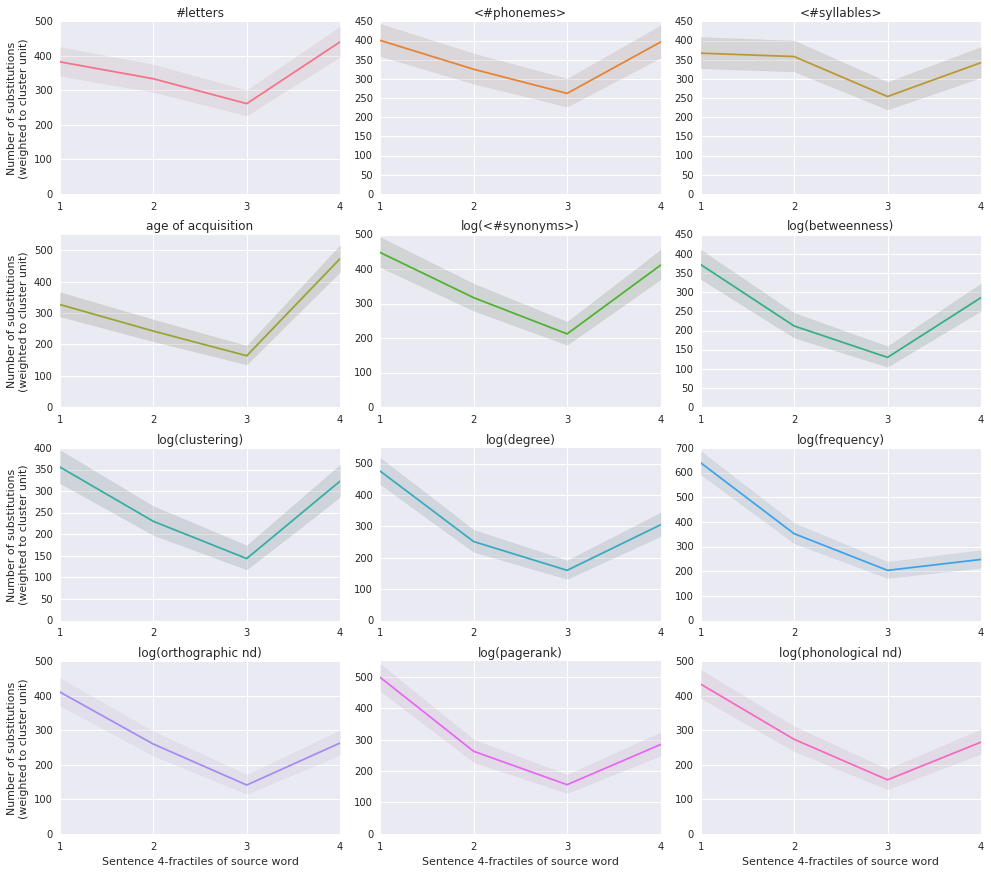

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

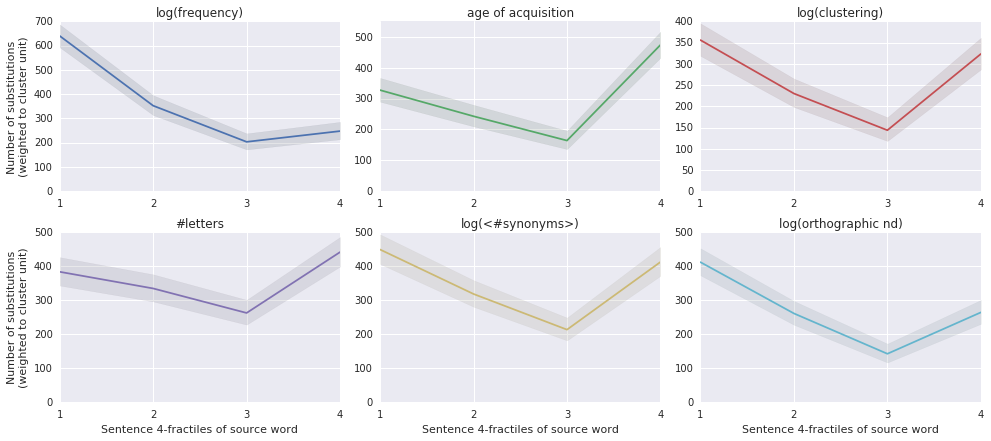

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)